<center>
<h1><b>Cardiomegaly Image Data set</b></h1>
</center>

## Cardiomegaly Overview

**Cardiomegaly** refers to an **enlargement of the heart**, which might be to heart failures

### Causes
1. **High Blood Pressure**
2. **Heart Valve Disease**
3. **Cardiomyopathy**

### Symptoms
- Shortness of breath
- Swelling in the legs
- Fatigue

### Diagnosis
- **Chest X-ray**
- **Echocardiogram**


# I. Data Visualization

In [3]:
#dependencies
import glob
import os


import networkx as nx
import matplotlib.pyplot as plt

import random
import matplotlib.image as mpimg

import seaborn as sns
from PIL import Image 

import numpy as np

In [4]:
#cardiomegaly_data_set_path
cardiomegaly_dataSet=r'C:\Users\wbmad\Desktop\F21DL\Dubai_PG-3\CardiomegalyDataSet'


In [5]:
def read_data(dataSet_path):


#result
 result=[]
# get subdirectorylist
 directories=os.listdir(cardiomegaly_dataSet)
 
 for directory in directories:
    directory_path=os.path.join(cardiomegaly_dataSet,directory)
    for sub_directory in os.listdir(directory_path):
        sub_directory_path=os.path.join(directory_path,sub_directory)
        imgs=glob.glob(os.path.join(sub_directory_path,"*.png"))
        name=directory+"_"+sub_directory+"_images"
        label=directory+"_"+sub_directory+"_labels"
        name=[]
        name.extend(imgs)
        label=[]
        label.extend([sub_directory]*len(imgs))
        #print(directory+"_"+sub_directory+":"+str(len(imgs)))
        images={"class":directory+"_"+sub_directory+"_images","values":imgs}
        labels={"class":directory+"_"+sub_directory+"_labels","values":label}
        result.append(images)
        result.append(labels)

    
 return result     

In [6]:
data=read_data(cardiomegaly_dataSet)

In [7]:
train_true_images=[]
train_true_labels=[]
train_false_images=[]
train_false_labels=[]
test_true_images=[]
test_true_labels=[]
test_false_images=[]
test_false_labels=[]


for d in data:
    if "train_true_images" in d["class"]:
        train_true_images.extend(d["values"])
    elif "train_true_labels" in d["class"]:
        train_true_labels.extend(d["values"])
    elif "train_false_images" in d["class"]:
        train_false_images.extend(d["values"])
    elif "train_false_labels" in d["class"]:
        train_false_labels.extend(d["values"])
    elif "test_true_images" in d["class"]:
        test_true_images.extend(d["values"])
    elif "test_true_labels" in d["class"]:
        test_true_labels.extend(d["values"])
    elif "test_false_images" in d["class"]:
        test_false_images.extend(d["values"])
    elif "test_false_labels" in d["class"]:
        test_false_labels.extend(d["values"])
        

In [8]:
#get image count
total=0
for d in data:
    if "images" in d["class"]:
     total+=(len(d["values"]))
     print(d["class"]+":"+str(len(d["values"]))) 
print(total)

test_false_images:557
test_true_images:557
train_false_images:2219
train_true_images:2219
5552


####  Data set has 5552 gray scaled chest X-ray images which consists of cardiomegaly and non cardiomegaly.

 * Cardiomegaly images - 2776
 * Non Cardiomegaly images - 2776


In [9]:
train_images=[]
train_labels=[]
train_images.extend(train_true_images)
train_images.extend(train_false_images)
train_labels.extend(train_true_labels)
train_labels.extend(train_false_labels)

print(len(train_images))
print(len(train_labels))

test_images=[]
test_labels=[]
test_images.extend(test_true_images)
test_images.extend(test_false_images)
test_labels.extend(test_true_labels)
test_labels.extend(test_false_labels)

print(len(test_images))
print(len(test_labels))

4438
4438
1114
1114


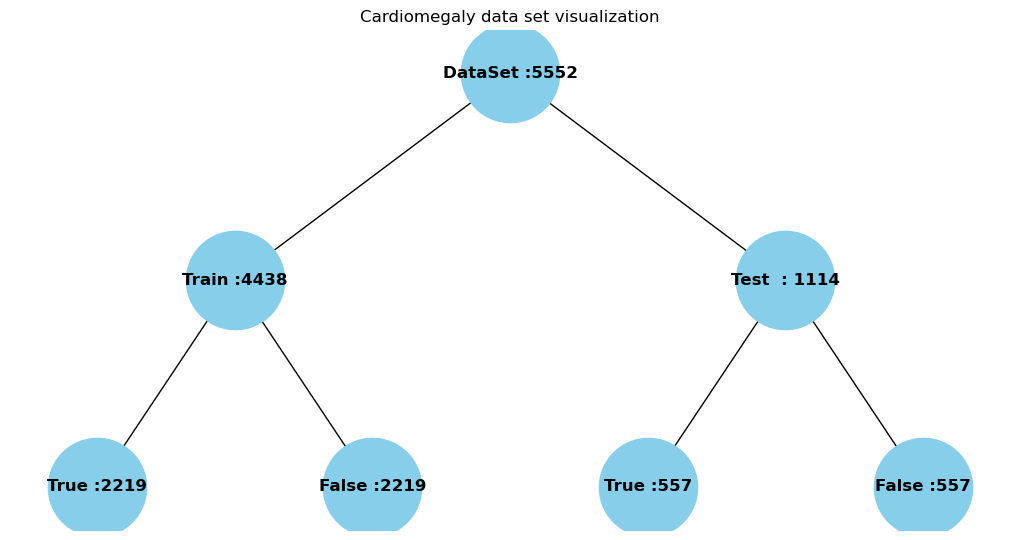

In [10]:
G=nx.Graph()

G.add_node(f"DataSet :{total}")
G.add_node(f"Train :{len(train_images)}")
G.add_node(f"Test  : {len(test_images)}")
G.add_edges_from([(f"DataSet :{total}",f"Train :{len(train_images)}"),(f"DataSet :{total}",f"Test  : {len(test_images)}")])
#train
G.add_node(f"True :{len(train_true_images)}")
G.add_node(f"False :{len(train_false_images)}")
G.add_edges_from([(f"Train :{len(train_images)}",f"True :{len(train_true_images)}"),
                  (f"Train :{len(train_images)}",f"False :{len(train_false_images)}")])

#test
G.add_node(f"True :{len(test_true_images)}")
G.add_node(f"False :{len(test_false_images)}")
G.add_edges_from([(f"Test  : {len(test_images)}",f"True :{len(test_true_images)}"),
                  (f"Test  : {len(test_images)}",f"False :{len(test_false_images)}")])

#positions
pos={f"DataSet :{total}":(0,3),
     f"Train :{len(train_images)}":(-2,2),
     f"Test  : {len(test_images)}":(2,2),
     f"True :{len(train_true_images)}":(-3,1),
     f"False :{len(train_false_images)}":(-1,1),
     f"True :{len(test_true_images)}":(1,1),
     f"False :{len(test_false_images)}":(3,1),  
    }

plt.figure(figsize=(10,5))
nx.draw(G,pos,with_labels="true",node_color="skyblue",node_size=5000,font_color="black",font_weight="bold")
plt.title("Cardiomegaly data set visualization")
plt.show()


In [11]:
def draw_pie_plot():
     # Data for pie charts
    trainCounts = [len(train_true_images), len(train_false_images)]
    testCounts = [len(test_true_images), len(test_false_images)]
    
    labels = ['True', 'False']
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 6))  # Two subplots side by side
    
    #pie chart for tgrain set
    axes[0].pie(trainCounts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
    axes[0].set_title('Train Set')
    
    # pie chart for test set
    axes[1].pie(testCounts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
    axes[1].set_title('Test Set')
    
    plt.tight_layout()
    plt.show()


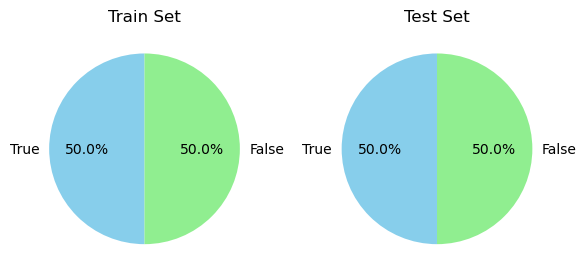

In [12]:
draw_pie_plot()

#### Both train set and test set are balanced since they have equal number of cardiomegaly and non-cardiomegaly images.

In [13]:
def get_distinct_image_sizes(image_set):
   size=[]
   for image in image_set:
     img=Image.open(image)
     if(img.size in size):
        continue
     else:
        size.append(img.size)
   return size
   
    

#### This is to ensure all the data are in same size of 128*128 

In [14]:
train_image_size=get_distinct_image_sizes(train_images)
print(f"train_image_size: {train_image_size}")
test_image_size=get_distinct_image_sizes(test_images)
print(f"test_image_size: {test_image_size}")

train_image_size: [(128, 128)]
test_image_size: [(128, 128)]


In [15]:
def show_sample_images(case,images,labels,numOfSamples):
    sampleIndices=random.sample(range(len(images)),numOfSamples)
    sampleImages=[images[sampleIndex] for sampleIndex in sampleIndices]
    samplelabels=[labels[sampleIndex] for sampleIndex in sampleIndices]

    figure,axes=plt.subplots(1,numOfSamples,figsize=(10,10))
    for i,(image,label) in enumerate(zip(sampleImages,samplelabels)):
        img=mpimg.imread(image)
        axes[i].imshow(img,cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f"{label}\n{os.path.basename(image)}",fontsize=10)

    plt.tight_layout()
    plt.show()

    return sampleImages,samplelabels
  

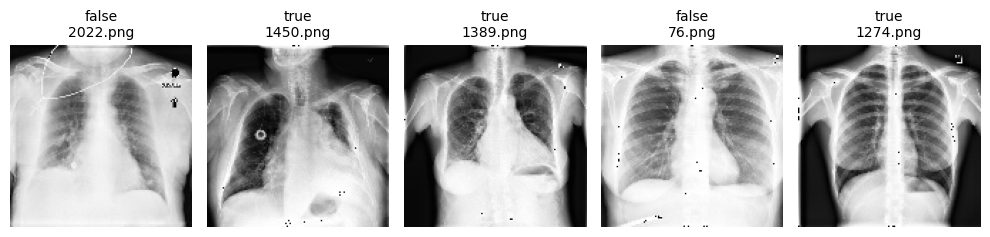

In [16]:
#showimages from train set
sample_train_images,sample_train_labels=show_sample_images("train",train_images,train_labels,5)

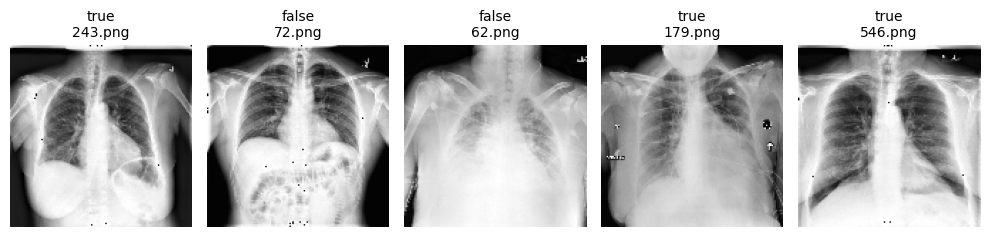

In [17]:
#show images from test set
sample_test_images,sample_test_labels=show_sample_images("False",test_images,test_labels,5)

# II. Data PreProcessing

#### Process data before apply to the CNN

 * Cardiomegaly images -1
 * Non Cardiomegaly images -0

In [18]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
import cv2
import numpy as np

In [20]:
def preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        #img = cv2.resize(img, (128, 128))  # Resize to 128x128
        img = np.expand_dims(img, axis=-1)  # Add channel dimension (for grayscale)
        images.append(img)
    return np.array(images, dtype=np.float32) / 255.0 

In [21]:

def load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels):
    # Convert lists of image paths to numpy arrays
    train_true_images = preprocess_images(train_true_images)
    train_false_images = preprocess_images(train_false_images)
    test_true_images = preprocess_images(test_true_images)
    test_false_images = preprocess_images(test_false_images)
    
    # Convert labels to numpy arrays (assuming they are already in the correct format)
    train_true_labels = np.array(train_true_labels)
    train_false_labels = np.array(train_false_labels)
    test_true_labels = np.array(test_true_labels)
    test_false_labels = np.array(test_false_labels)
    
    # Now combine the data
    X_train = np.concatenate((train_true_images, train_false_images), axis=0)
    label_train = np.concatenate((train_true_labels, train_false_labels), axis=0)
    label_train=label_train == 'true'
    y_train =label_train.astype(np.float32)
    
    X_test = np.concatenate((test_true_images, test_false_images), axis=0)
    label_test = np.concatenate((test_true_labels, test_false_labels), axis=0)
    label_test=label_test == 'true'
    y_test = label_test.astype(np.float32)
    
    #print(X_train)
    
    return X_train,y_train,X_test,y_test




# III. Create Model- CNN

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
# Clear the Keras session (this will reset everything)
K.clear_session()



#### This model consists of:
 * 3 Convolutional Layers 
 *  3 Pooling Layers
 *  Hidden Fully Connected Layer(Dense Layer)
 *  Dropout Layer
 *  Output Layer

#### Relu function is used for hidden layers

  * ##### f(x)=max(0,x)
  
     where
      f(x)={
             
             if x>0 ,x
  
             if x<=0,0
            } 
            
   * ##### Range(0,infinity)

#### Sigmoid function  is used for output layer
   * ##### since range is (0,1) good for  binary classification


      

In [23]:

def create_CNN_model(optimize):
  #create the model
  model=Sequential(name='cardiomegaly-CNN-model')

  #First Convolutional layer

  #kernal size=3*3
  #filter size=32
  #use relu as the activation function for non-linearity
  #since the images are gray scaled shape is (128 *128) which is derived above
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1),padding='same'))
  #add pooling layer 2*2 to redduce the size of featue map. This highlights the most important features
  model.add(layers.MaxPooling2D(2,2))


  #Second Convolutional layer

  #kernal size=3*3
    
  #filters=64
  #use relu as the activation function for non-linearity
  #output of the previous layer is used as input
  model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
  #add pooling layer 2*2 to redduce the size of featue map. This highlights the most important features
  model.add(layers.MaxPooling2D(2,2))

  #Third Convolutional layer

  #kernal size=3*3
  #filters=128
  #use relu as the activation function for non-linearity
  #output of the previous layer is used as input
  model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
  #add pooling layer 2*2 to redduce the size of featue map. This highlights the most important features
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
  #add pooling layer 2*2 to redduce the size of featue map. This highlights the most important features
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Dropout(0.3))


  #Flatten model to convert multidimensional to 1D which can which can be used by fully connected layers(dense)
  model.add(layers.Flatten())

  #first Dense Layer-hidden
  #dense layers to learn  how to combine the features exract by convolutional layers
  #number of neurons=128
  #use relu as the activation function
  model.add(layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))

  #dropout layer to prevent overfitting
  model.add(layers.Dropout(0.4))


  #dropout layer to prevent overfitting
  model.add(layers.Dropout(0.5))

  #output Dense layer for binary classification
  model.add(layers.Dense(1,activation='sigmoid'))
  
  model.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])
  return model






In [24]:
from rich.table import Table
from rich.console import Console

def print_summay(model_name,model):
 console = Console()
 table = Table(title=model_name)

 table.add_column("Layer",style="cyan",justify="left")
 table.add_column("InputShape",style="magenta",justify="left")
 table.add_column("OutputShape",style="magenta",justify="left")
 table.add_column("Param #",style="green",justify="left")

 for layer in model.layers:
    layer_name=layer.name
    input_shape=str(layer.input_shape)
    output_shape=str(layer.output_shape)
    param_count=layer.count_params()
    table.add_row(layer_name,input_shape,output_shape,str(param_count))

 console.print(table)



In [25]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model=create_CNN_model(optimizer)

In [26]:
print_summay('Craiomegaly CNN model',model)

                           Craiomegaly CNN model                           
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer           ┃ InputShape           ┃ OutputShape          ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ conv2d          │ (None, 128, 128, 1)  │ (None, 128, 128, 32) │ 320     │
│ max_pooling2d   │ (None, 128, 128, 32) │ (None, 64, 64, 32)   │ 0       │
│ conv2d_1        │ (None, 64, 64, 32)   │ (None, 64, 64, 64)   │ 18496   │
│ max_pooling2d_1 │ (None, 64, 64, 64)   │ (None, 32, 32, 64)   │ 0       │
│ conv2d_2        │ (None, 32, 32, 64)   │ (None, 32, 32, 128)  │ 73856   │
│ max_pooling2d_2 │ (None, 32, 32, 128)  │ (None, 16, 16, 128)  │ 0       │
│ conv2d_3        │ (None, 16, 16, 128)  │ (None, 16, 16, 128)  │ 147584  │
│ max_pooling2d_3 │ (None, 16, 16, 128)  │ (None, 8, 8, 128)    │ 0       │
│ dropout         │ (None, 8, 8, 128)    │ (None, 8, 8, 128)    │ 0       │
│ flatten         │ (None, 8, 8, 128)    │ (None, 8192)         │ 0       │
│ dense           │ (None, 8192)         │ (None, 128)          │ 1048704 │
│ dropout_1       │ (None, 128)          │ (None, 128)          │ 0       │
│ dropout_2       │ (None, 128)          │ (None, 128)          │ 0       │
│ dense_1         │ (None, 128)          │ (None, 1)            │ 129     │
└─────────────────┴──────────────────────┴──────────────────────┴─────────┘

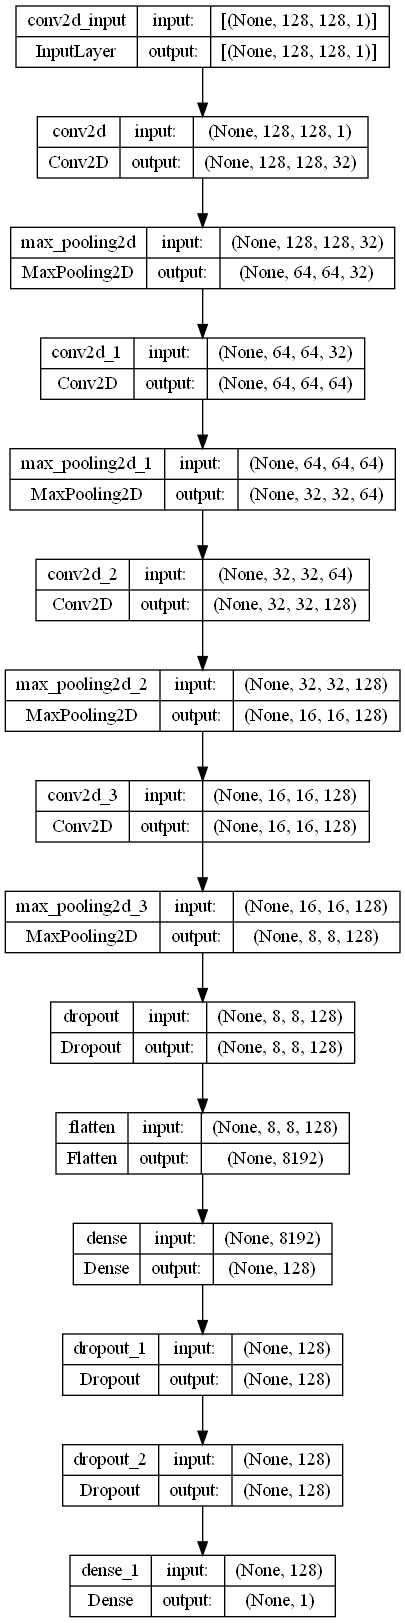

In [27]:
plot_model(model, show_shapes=True, show_layer_names=True)

# IV. Training and Evaluation

## Functions

In [28]:
def plot_accuracy_and_loss(history):

    train_accuracy = history.history['accuracy']
    train_loss = history.history['loss']
    
    validation_accuracy = history.history['val_accuracy']
    validation_loss = history.history['val_loss']
    
    # minimum value loss index of epoch
    index_loss = np.argmin(validation_loss)
    val_lowest = validation_loss[index_loss]
    
    index_acc = np.argmax(validation_accuracy)
    val_highest = validation_accuracy[index_acc]
    
    Epochs = [i+1 for i in range(len(train_accuracy))]
    
    loss_label = f'Best epochs = {str(index_loss +1)}'
    acc_label = f'Best epochs = {str(index_acc + 1)}'
    
    #Training history
    
    plt.figure(figsize= (20,8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1,2,1)
    plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
    plt.plot(Epochs , validation_loss , 'g' , label = 'Validation Loss')
    plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(Epochs , train_accuracy , 'r' , label = 'Training Accuracy')
    plt.plot(Epochs , validation_accuracy , 'g' , label = 'Validation Accuracy')
    plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show();

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)


def calculate_measures (model,verbose=0):
    loss, accuracy = model.evaluate(X_test, y_test,verbose=verbose)
    
    # Get model predictions (probabilities)
    y_pred_prob = model.predict(X_test,verbose=verbose)
    # Convert probabilities to binary predictions (0 or 1)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate Precision, Recall, and F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy,loss,precision,recall,f1

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=10,             # Stop after 10 epochs of no improvement
    verbose=1,               # Print a message when stopping occurs
    
    restore_best_weights=True # Restore the model to the best weights (lowest val_loss)
)

#### early stopping is used to avoid the overfitting of model. This monitor the minimum value loss and restore relavent weights

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model):
    X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)
    y_pred_prob = model.predict(X_test)
    
    # Convert probabilities to binary predictions (0 or 1)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Step 2: Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Step 3: Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    
    # Add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    return cm
    

## 1. CNN Training and Evaluation with different batch sizes

### i. batch_size=32

####  Train

In [124]:

K.clear_session()
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model_with_adam_optimizer_32=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

    # Train the model
history_model_with_adam_optimizer_32=model_with_adam_optimizer_32.fit(X_train_data,y_train_data,epochs=100,batch_size=32,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100
111/111 [==============================] - 86s 767ms/step - loss: 0.9488 - accuracy: 0.5087 - val_loss: 0.6973 - val_accuracy: 0.4775
Epoch 2/100
111/111 [==============================] - 88s 788ms/step - loss: 0.6942 - accuracy: 0.4958 - val_loss: 0.6936 - val_accuracy: 0.4775
Epoch 3/100
111/111 [==============================] - 86s 772ms/step - loss: 0.6933 - accuracy: 0.5056 - val_loss: 0.6936 - val_accuracy: 0.4775
Epoch 4/100
111/111 [==============================] - 88s 795ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6937 - val_accuracy: 0.4775
Epoch 5/100
111/111 [==============================] - 86s 775ms/step - loss: 0.6930 - accuracy: 0.5056 - val_loss: 0.6939 - val_accuracy: 0.4775
Epoch 6/100
111/111 [==============================] - 86s 780ms/step - loss: 0.6930 - accuracy: 0.5056 - val_loss: 0.6953 - val_accuracy: 0.4775
Epoch 7/100
111/111 [==============================] - 86s 778ms/step - loss: 0.6936 - accuracy: 0.5056 - val_loss: 0.6938 -

#### Model Evaluation

In [136]:
calculate_measures (model_with_adam_optimizer_32)


35/35 [==============================] - 9s 245ms/step - loss: 0.5582 - accuracy: 0.7172
Test Accuracy: 71.72%
35/35 [==============================] - 8s 230ms/step
accuracy:0.7172352075576782
loss:0.5581809282302856
precision:0.6699438202247191
recall:0.8563734290843806
F1_score:0.7517730496453902


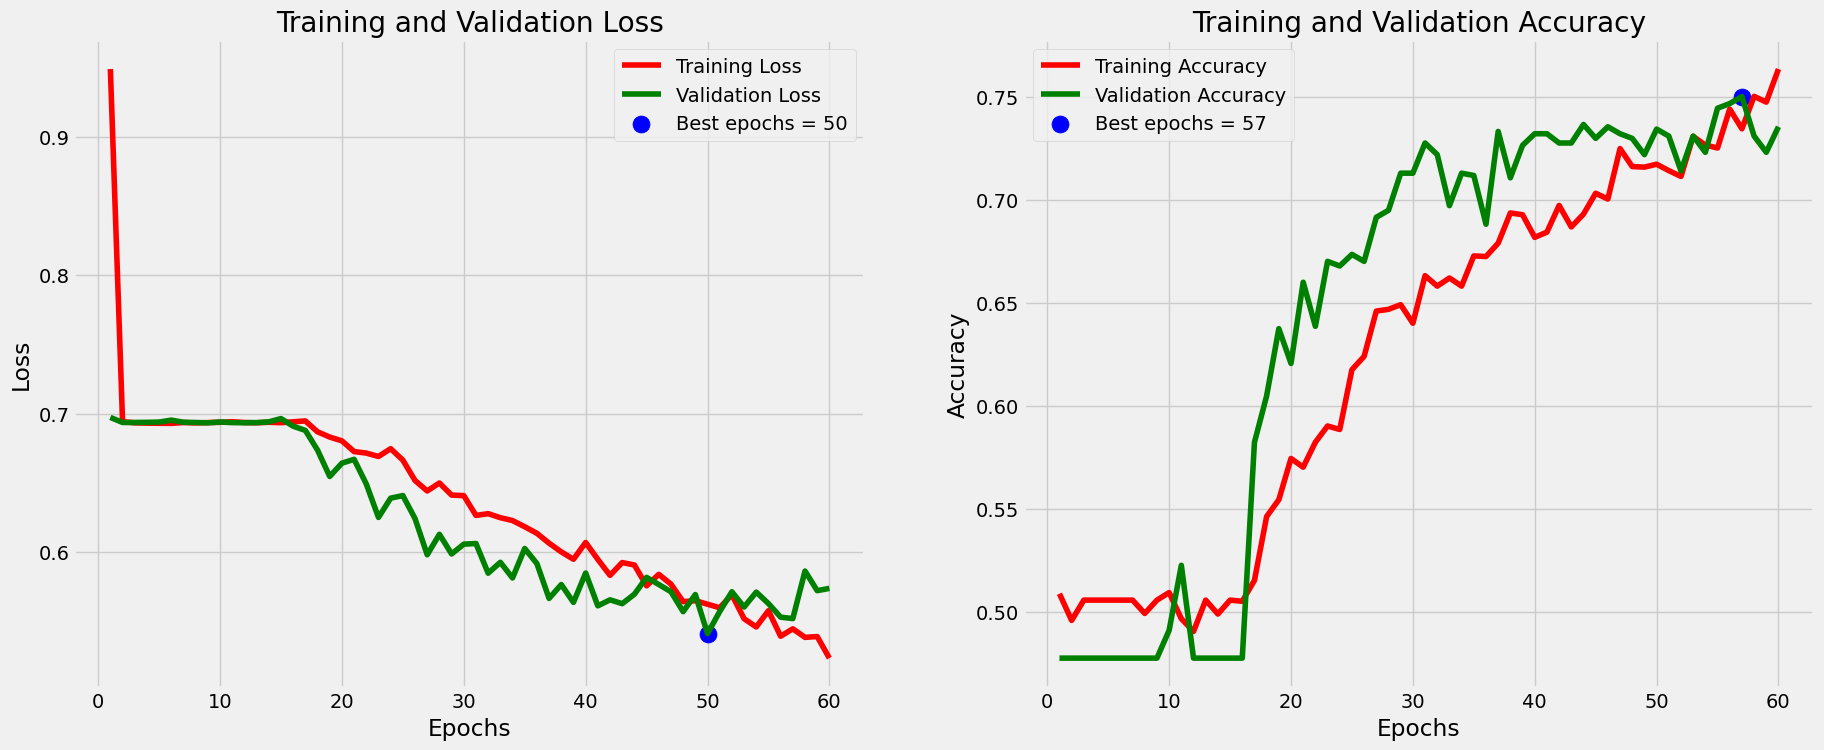

In [127]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_32)

35/35 [==============================] - 8s 231ms/step


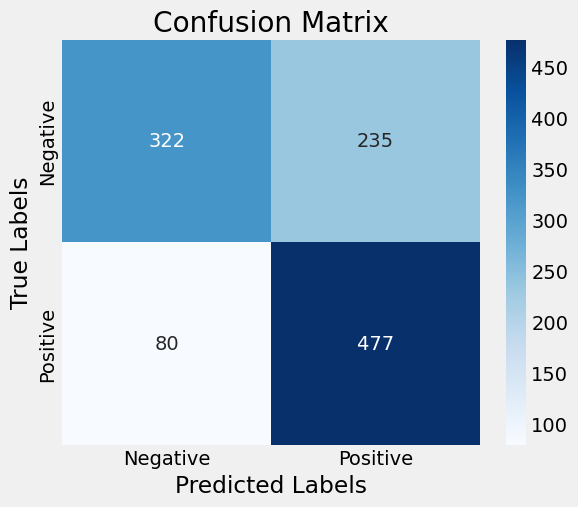

In [138]:
plot_confusion_matrix(model_with_adam_optimizer_32)

### ii. batch_size=64

#### Train

In [141]:

K.clear_session()
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model_with_adam_optimizer_64=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

    # Train the model
history_model_with_adam_optimizer_64=model_with_adam_optimizer_64.fit(X_train_data,y_train_data,epochs=100,batch_size=64,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100
56/56 [==============================] - 79s 1s/step - loss: 1.1157 - accuracy: 0.4997 - val_loss: 0.7021 - val_accuracy: 0.4797
Epoch 2/100
56/56 [==============================] - 78s 1s/step - loss: 0.6952 - accuracy: 0.5034 - val_loss: 0.6938 - val_accuracy: 0.4876
Epoch 3/100
56/56 [==============================] - 74s 1s/step - loss: 0.6945 - accuracy: 0.5082 - val_loss: 0.6935 - val_accuracy: 0.5619
Epoch 4/100
56/56 [==============================] - 76s 1s/step - loss: 0.6938 - accuracy: 0.5380 - val_loss: 0.6904 - val_accuracy: 0.5360
Epoch 5/100
56/56 [==============================] - 74s 1s/step - loss: 0.6952 - accuracy: 0.5563 - val_loss: 0.6848 - val_accuracy: 0.6160
Epoch 6/100
56/56 [==============================] - 76s 1s/step - loss: 0.6913 - accuracy: 0.5699 - val_loss: 0.6748 - val_accuracy: 0.6025
Epoch 7/100
56/56 [==============================] - 76s 1s/step - loss: 0.6767 - accuracy: 0.6017 - val_loss: 0.6635 - val_accuracy: 0.6622
Epoch 8/100
5

#### Model Evaluation

In [143]:
calculate_measures (model_with_adam_optimizer_64)

35/35 [==============================] - 9s 256ms/step - loss: 0.5421 - accuracy: 0.7522
Test Accuracy: 75.22%
35/35 [==============================] - 7s 201ms/step
accuracy:0.7522441744804382
loss:0.5421015620231628
precision:0.7051094890510949
recall:0.8671454219030521
F1_score:0.7777777777777778


(0.7522441744804382,
 0.5421015620231628,
 0.7051094890510949,
 0.8671454219030521,
 0.7777777777777778)

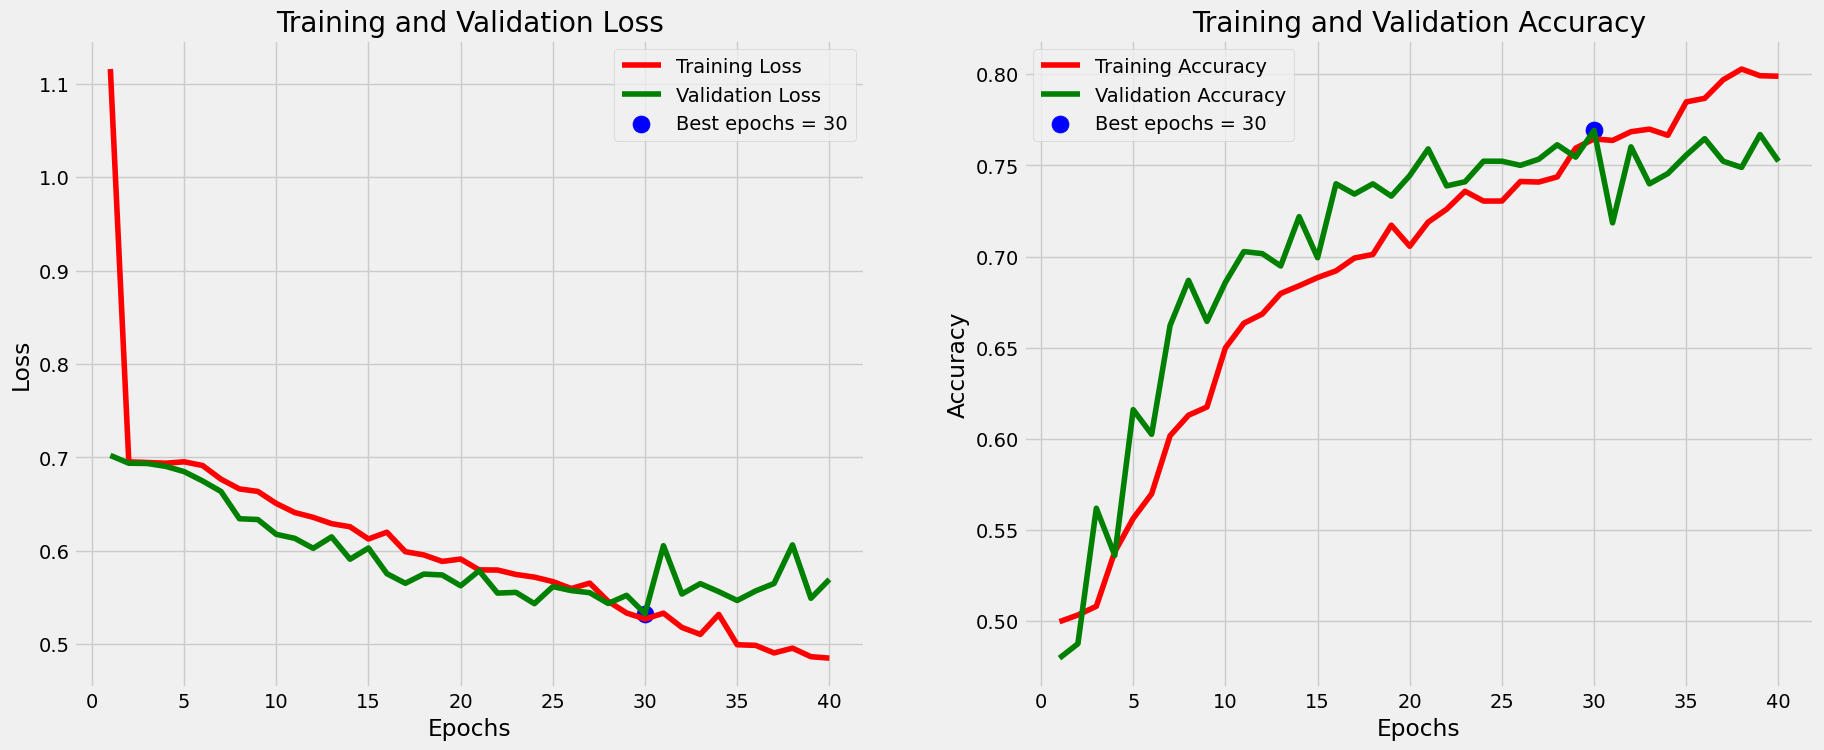

In [144]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_64)

35/35 [==============================] - 7s 210ms/step


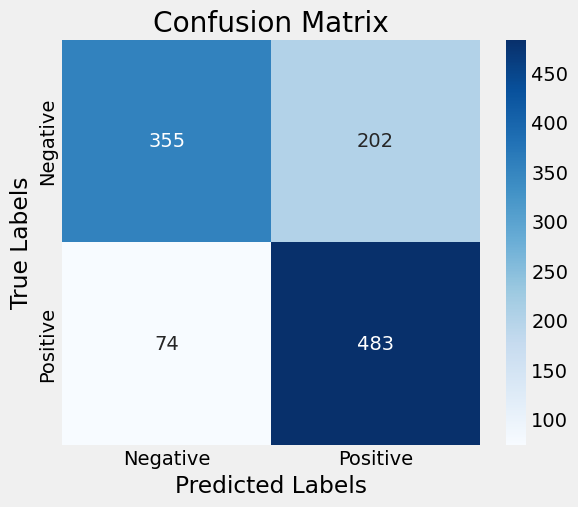

In [145]:
plot_confusion_matrix(model_with_adam_optimizer_64)

### iii. batch_size=128

#### Train

In [154]:

K.clear_session()
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model_with_adam_optimizer_128=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

    # Train the model
history_model_with_adam_optimizer_128=model_with_adam_optimizer_128.fit(X_train_data,y_train_data,epochs=100,batch_size=128,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100
28/28 [==============================] - 45s 2s/step - loss: 1.5012 - accuracy: 0.4980 - val_loss: 0.7902 - val_accuracy: 0.4775
Epoch 2/100
28/28 [==============================] - 43s 2s/step - loss: 0.7408 - accuracy: 0.5189 - val_loss: 0.7083 - val_accuracy: 0.4752
Epoch 3/100
28/28 [==============================] - 43s 2s/step - loss: 0.6989 - accuracy: 0.5403 - val_loss: 0.6810 - val_accuracy: 0.6239
Epoch 4/100
28/28 [==============================] - 44s 2s/step - loss: 0.6893 - accuracy: 0.5915 - val_loss: 0.6724 - val_accuracy: 0.6115
Epoch 5/100
28/28 [==============================] - 43s 2s/step - loss: 0.6769 - accuracy: 0.6113 - val_loss: 0.6649 - val_accuracy: 0.6160
Epoch 6/100
28/28 [==============================] - 44s 2s/step - loss: 0.6635 - accuracy: 0.6389 - val_loss: 0.6380 - val_accuracy: 0.6723
Epoch 7/100
28/28 [==============================] - 43s 2s/step - loss: 0.6447 - accuracy: 0.6645 - val_loss: 0.6280 - val_accuracy: 0.6881
Epoch 8/100
2

#### Model Evaluation

In [155]:
calculate_measures (model_with_adam_optimizer_128)

35/35 [==============================] - 8s 214ms/step - loss: 0.5414 - accuracy: 0.7478
Test Accuracy: 74.78%
35/35 [==============================] - 8s 212ms/step
accuracy:0.7477558255195618
loss:0.541390061378479
precision:0.7129629629629629
recall:0.829443447037702
F1_score:0.7668049792531121


(0.7477558255195618,
 0.541390061378479,
 0.7129629629629629,
 0.829443447037702,
 0.7668049792531121)

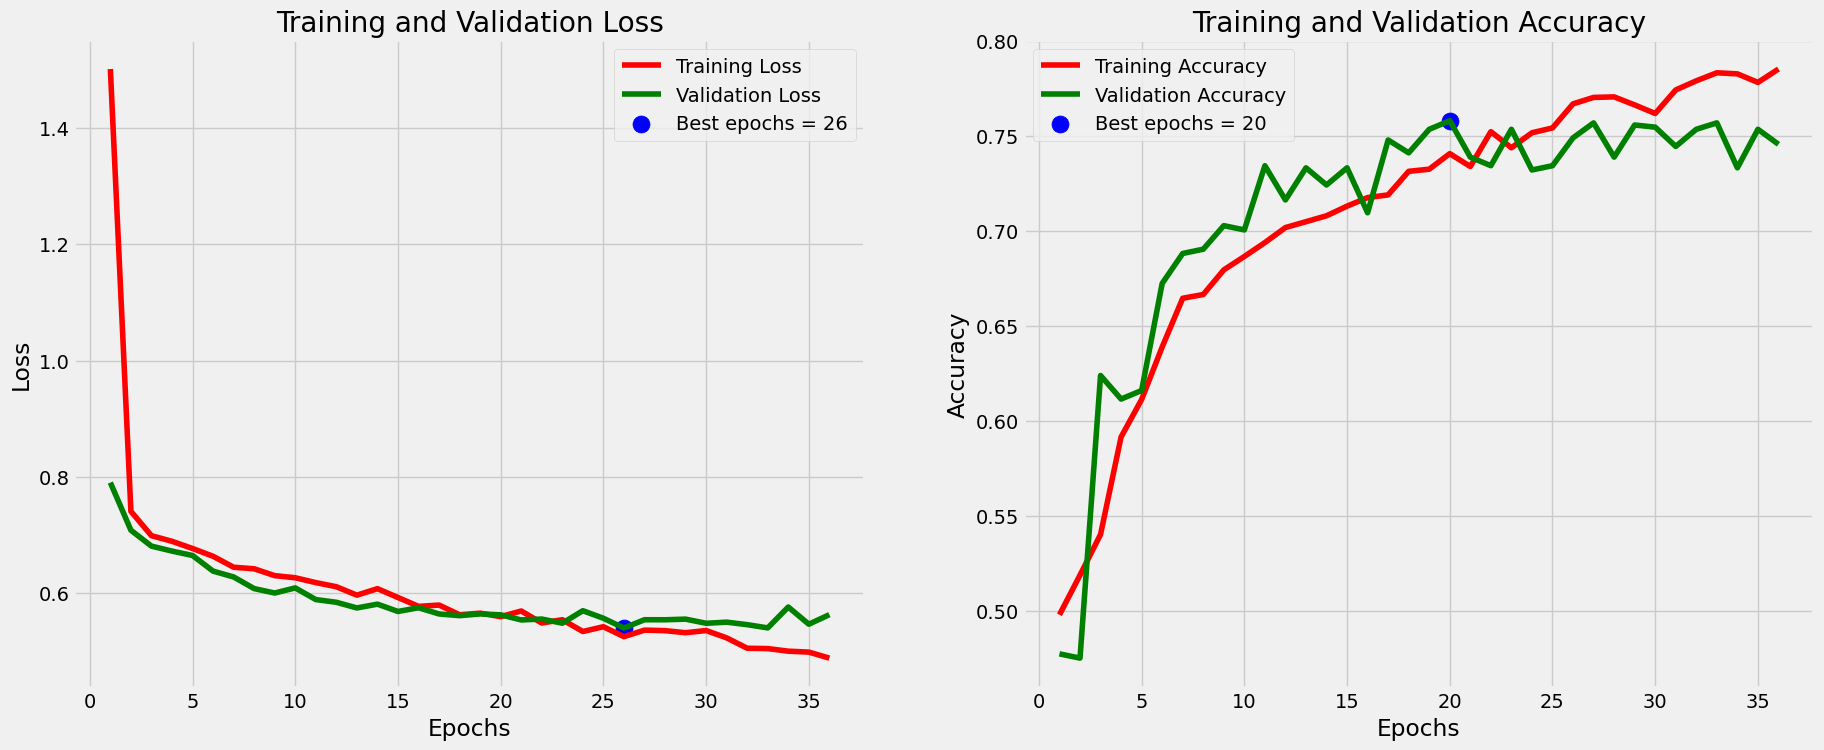

In [156]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_128)

35/35 [==============================] - 7s 207ms/step


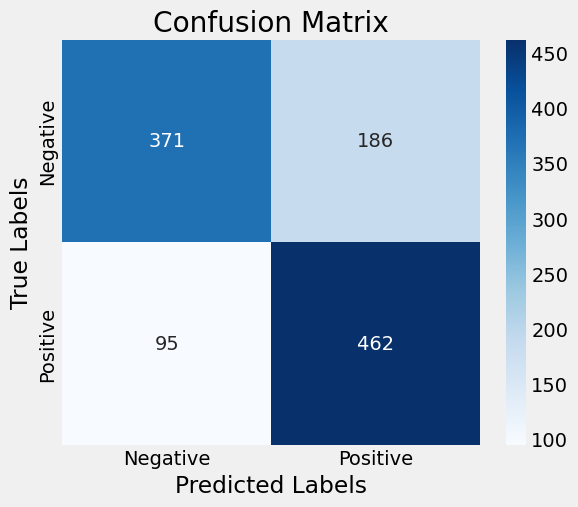

In [157]:
plot_confusion_matrix(model_with_adam_optimizer_128)

### iv. batch_size=512

#### Train

In [163]:

K.clear_session()
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model_with_adam_optimizer_512=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

    # Train the model
history_model_with_adam_optimizer_512=model_with_adam_optimizer_512.fit(X_train_data,y_train_data,epochs=100,batch_size=512,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100
7/7 [==============================] - 42s 5s/step - loss: 2.5843 - accuracy: 0.5107 - val_loss: 1.8493 - val_accuracy: 0.4730
Epoch 2/100
7/7 [==============================] - 34s 5s/step - loss: 1.4981 - accuracy: 0.4972 - val_loss: 1.1280 - val_accuracy: 0.4764
Epoch 3/100
7/7 [==============================] - 34s 5s/step - loss: 0.9784 - accuracy: 0.5056 - val_loss: 0.8365 - val_accuracy: 0.4752
Epoch 4/100
7/7 [==============================] - 34s 5s/step - loss: 0.7897 - accuracy: 0.5166 - val_loss: 0.7505 - val_accuracy: 0.4854
Epoch 5/100
7/7 [==============================] - 35s 5s/step - loss: 0.7382 - accuracy: 0.5265 - val_loss: 0.7299 - val_accuracy: 0.4842
Epoch 6/100
7/7 [==============================] - 34s 5s/step - loss: 0.7198 - accuracy: 0.5552 - val_loss: 0.7062 - val_accuracy: 0.5935
Epoch 7/100
7/7 [==============================] - 34s 5s/step - loss: 0.7023 - accuracy: 0.5617 - val_loss: 0.6859 - val_accuracy: 0.5980
Epoch 8/100
7/7 [==========

#### Model Evaluation

In [210]:
calculate_measures (model_with_adam_optimizer_512)

35/35 [==============================] - 7s 208ms/step - loss: 0.5617 - accuracy: 0.7460
Test Accuracy: 74.60%
35/35 [==============================] - 7s 195ms/step
[[0.88923216]
 [0.59779567]
 [0.90809995]
 ...
 [0.46824217]
 [0.20490168]
 [0.61649245]]
accuracy:0.7459604740142822
loss:0.5616607666015625
precision:0.7147335423197492
recall:0.8186714542190305
F1_score:0.7631799163179915


(0.7459604740142822,
 0.5616607666015625,
 0.7147335423197492,
 0.8186714542190305,
 0.7631799163179915)

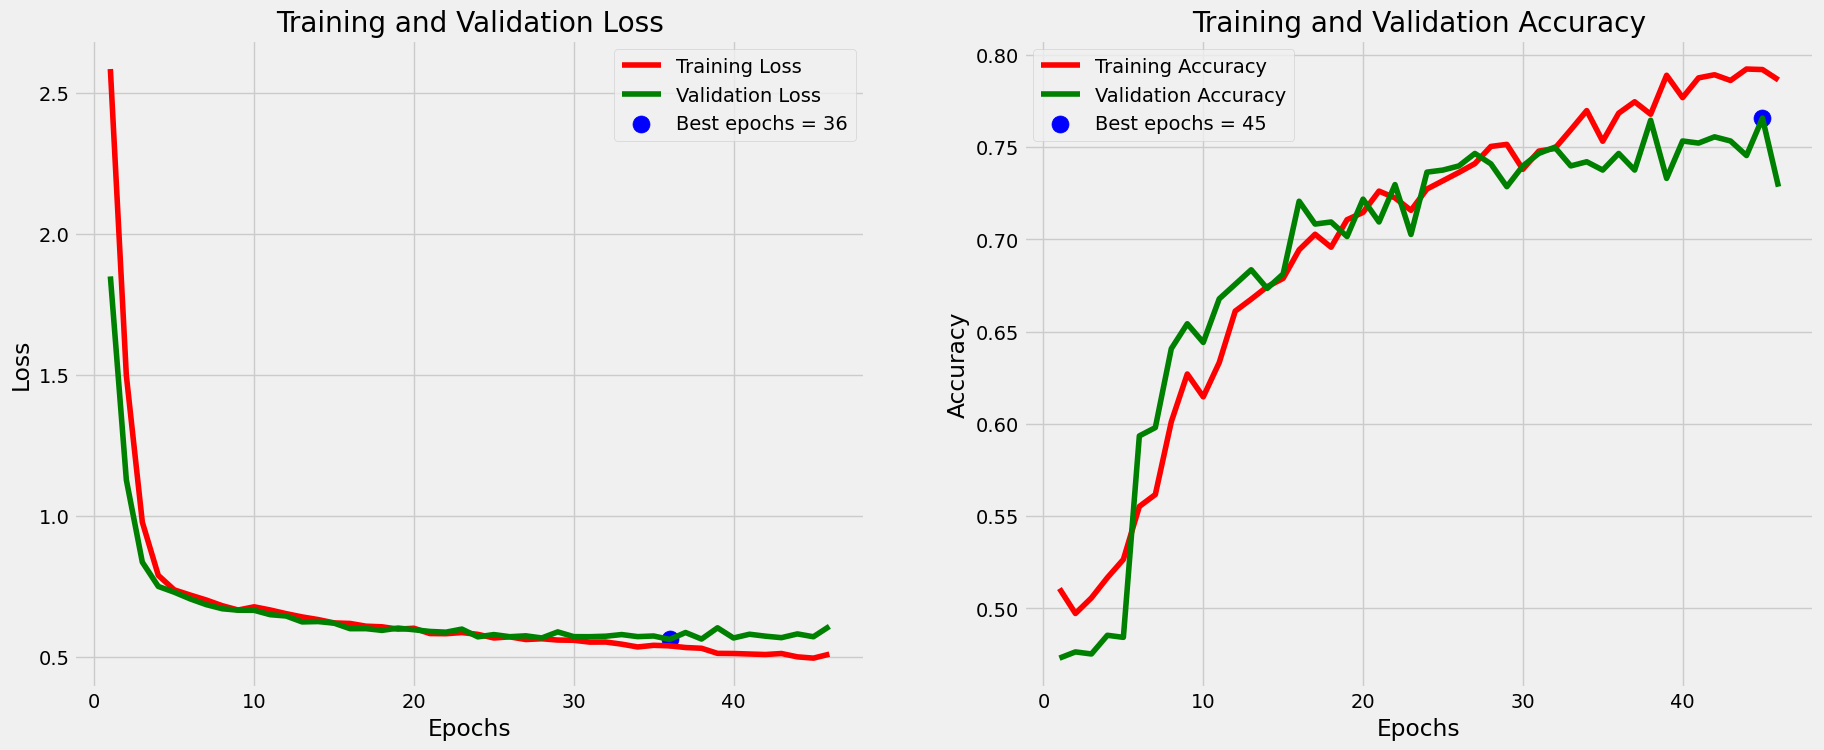

In [166]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_512)

35/35 [==============================] - 8s 216ms/step


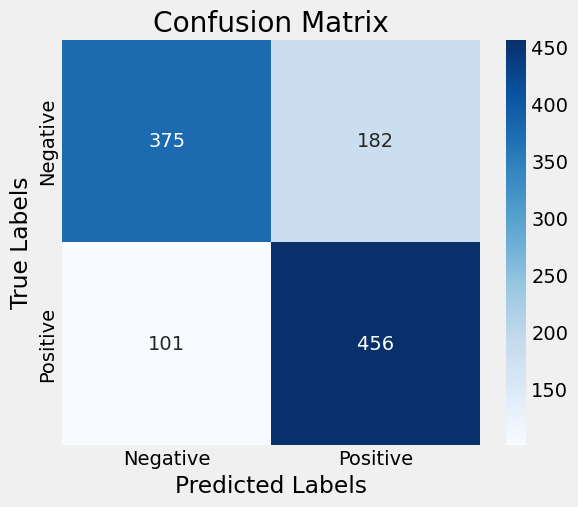

In [167]:
plot_confusion_matrix(model_with_adam_optimizer_512)

#### Train

#### Model Evaluation

In [ ]:
calculate_measures (model_with_adam_optimizer_1064)

In [ ]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_1064)

In [ ]:
plot_confusion_matrix(model_with_adam_optimizer_1064)

## 2. CNN Training and Evaluation with different learning rates

### i. Learning rate-0.1

#### Train

In [169]:

K.clear_session()
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.1)
model_with_adam_optimizer_l1=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

    # Train the model
history_model_with_adam_optimizer_l1=model_with_adam_optimizer_l1.fit(X_train_data,y_train_data,epochs=100,batch_size=64,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100
56/56 [==============================] - 75s 1s/step - loss: 1396.2336 - accuracy: 0.4935 - val_loss: 695.8445 - val_accuracy: 0.5225
Epoch 2/100
56/56 [==============================] - 75s 1s/step - loss: 599.2806 - accuracy: 0.4848 - val_loss: 510.3880 - val_accuracy: 0.4775
Epoch 3/100
56/56 [==============================] - 71s 1s/step - loss: 446.7973 - accuracy: 0.4961 - val_loss: 387.5500 - val_accuracy: 0.4775
Epoch 4/100
56/56 [==============================] - 74s 1s/step - loss: 342.7516 - accuracy: 0.5090 - val_loss: 300.1273 - val_accuracy: 0.4775
Epoch 5/100
56/56 [==============================] - 74s 1s/step - loss: 266.8727 - accuracy: 0.5017 - val_loss: 234.8631 - val_accuracy: 0.4775
Epoch 6/100
56/56 [==============================] - 73s 1s/step - loss: 209.4394 - accuracy: 0.4724 - val_loss: 184.7966 - val_accuracy: 0.4775
Epoch 7/100
56/56 [==============================] - 74s 1s/step - loss: 165.0153 - accuracy: 0.4989 - val_loss: 145.7686 - val_a

#### Model Evaluation

In [172]:
calculate_measures (model_with_adam_optimizer_l1)

35/35 [==============================] - 8s 214ms/step - loss: 0.7047 - accuracy: 0.5000
Test Accuracy: 50.00%
35/35 [==============================] - 7s 198ms/step
accuracy:0.5
loss:0.704692006111145
precision:0.5
recall:1.0
F1_score:0.6666666666666666


(0.5, 0.704692006111145, 0.5, 1.0, 0.6666666666666666)

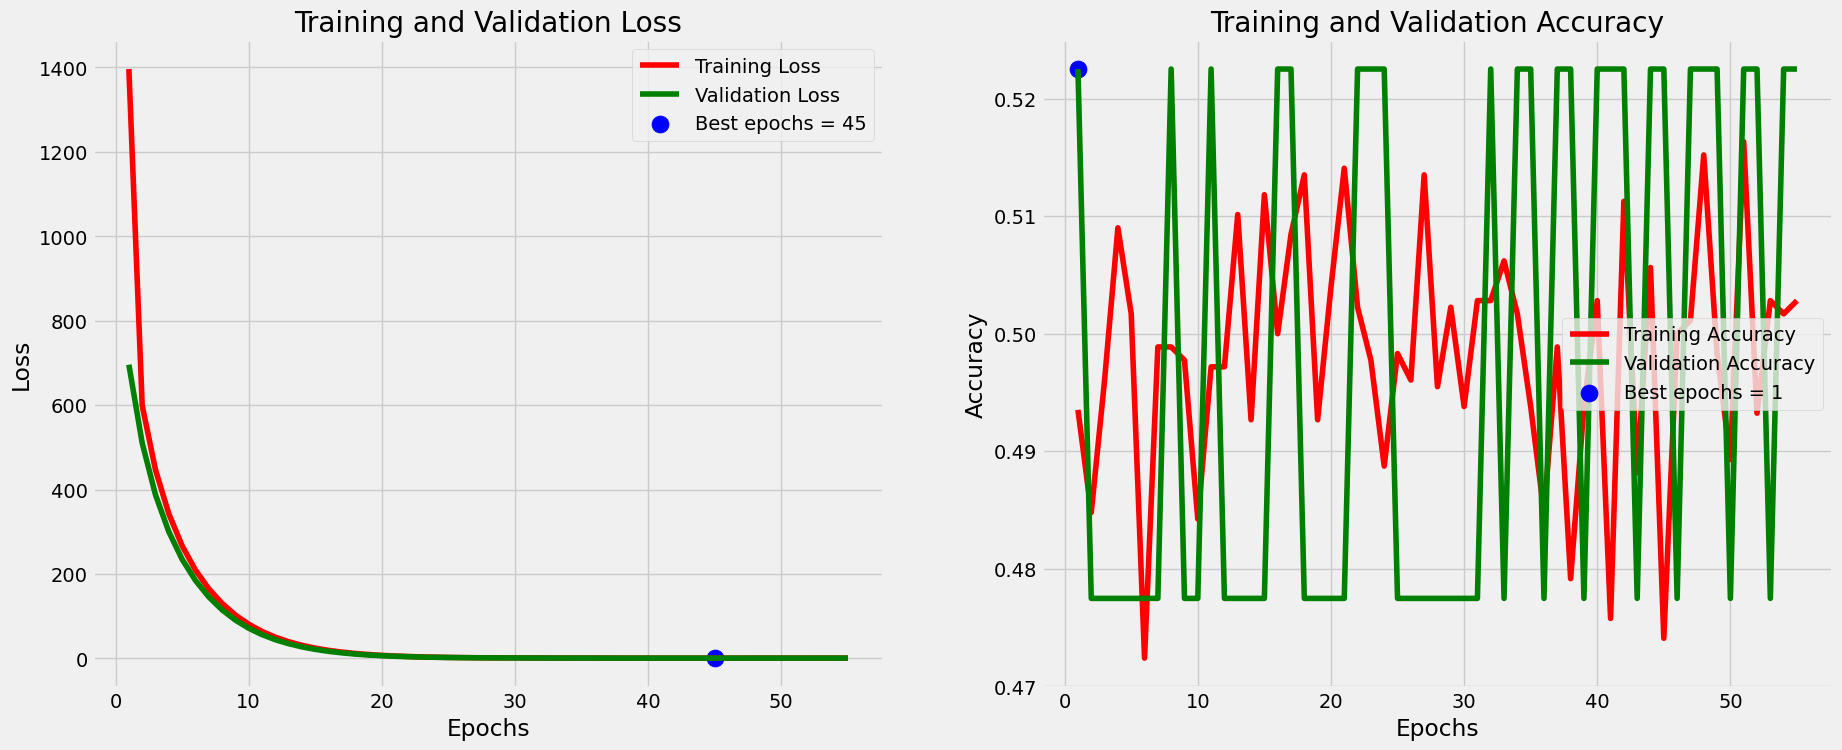

In [173]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_l1)

35/35 [==============================] - 7s 194ms/step


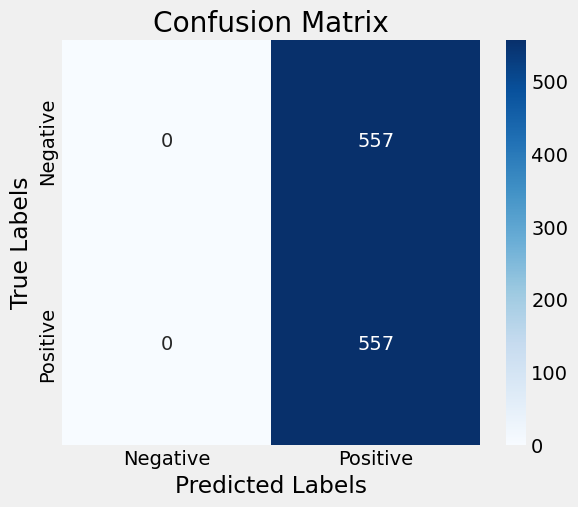

In [174]:
plot_confusion_matrix(model_with_adam_optimizer_l1)

### ii. Learning rate-0.01

#### Train

In [176]:
K.clear_session()
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
model_with_adam_optimizer_l2=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
# Train the model
history_model_with_adam_optimizer_l2=model_with_adam_optimizer_l2.fit(X_train_data,y_train_data,epochs=100,batch_size=64,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100
56/56 [==============================] - 69s 1s/step - loss: 1.9445 - accuracy: 0.5045 - val_loss: 0.8366 - val_accuracy: 0.5225
Epoch 2/100
56/56 [==============================] - 65s 1s/step - loss: 0.7298 - accuracy: 0.5008 - val_loss: 0.6971 - val_accuracy: 0.4775
Epoch 3/100
56/56 [==============================] - 63s 1s/step - loss: 0.6939 - accuracy: 0.5132 - val_loss: 0.6942 - val_accuracy: 0.4775
Epoch 4/100
56/56 [==============================] - 63s 1s/step - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6945 - val_accuracy: 0.4775
Epoch 5/100
56/56 [==============================] - 62s 1s/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6936 - val_accuracy: 0.4775
Epoch 6/100
56/56 [==============================] - 65s 1s/step - loss: 0.6935 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4775
Epoch 7/100
56/56 [==============================] - 65s 1s/step - loss: 0.6933 - accuracy: 0.4932 - val_loss: 0.6934 - val_accuracy: 0.4775
Epoch 8/100
5

#### Model Evaluation

In [211]:
calculate_measures(model_with_adam_optimizer_l2)

35/35 [==============================] - 7s 203ms/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 50.00%
35/35 [==============================] - 7s 207ms/step
[[0.5034466]
 [0.5034466]
 [0.5034466]
 ...
 [0.5034466]
 [0.5034466]
 [0.5034466]]
accuracy:0.5
loss:0.6931730508804321
precision:0.5
recall:1.0
F1_score:0.6666666666666666


(0.5, 0.6931730508804321, 0.5, 1.0, 0.6666666666666666)

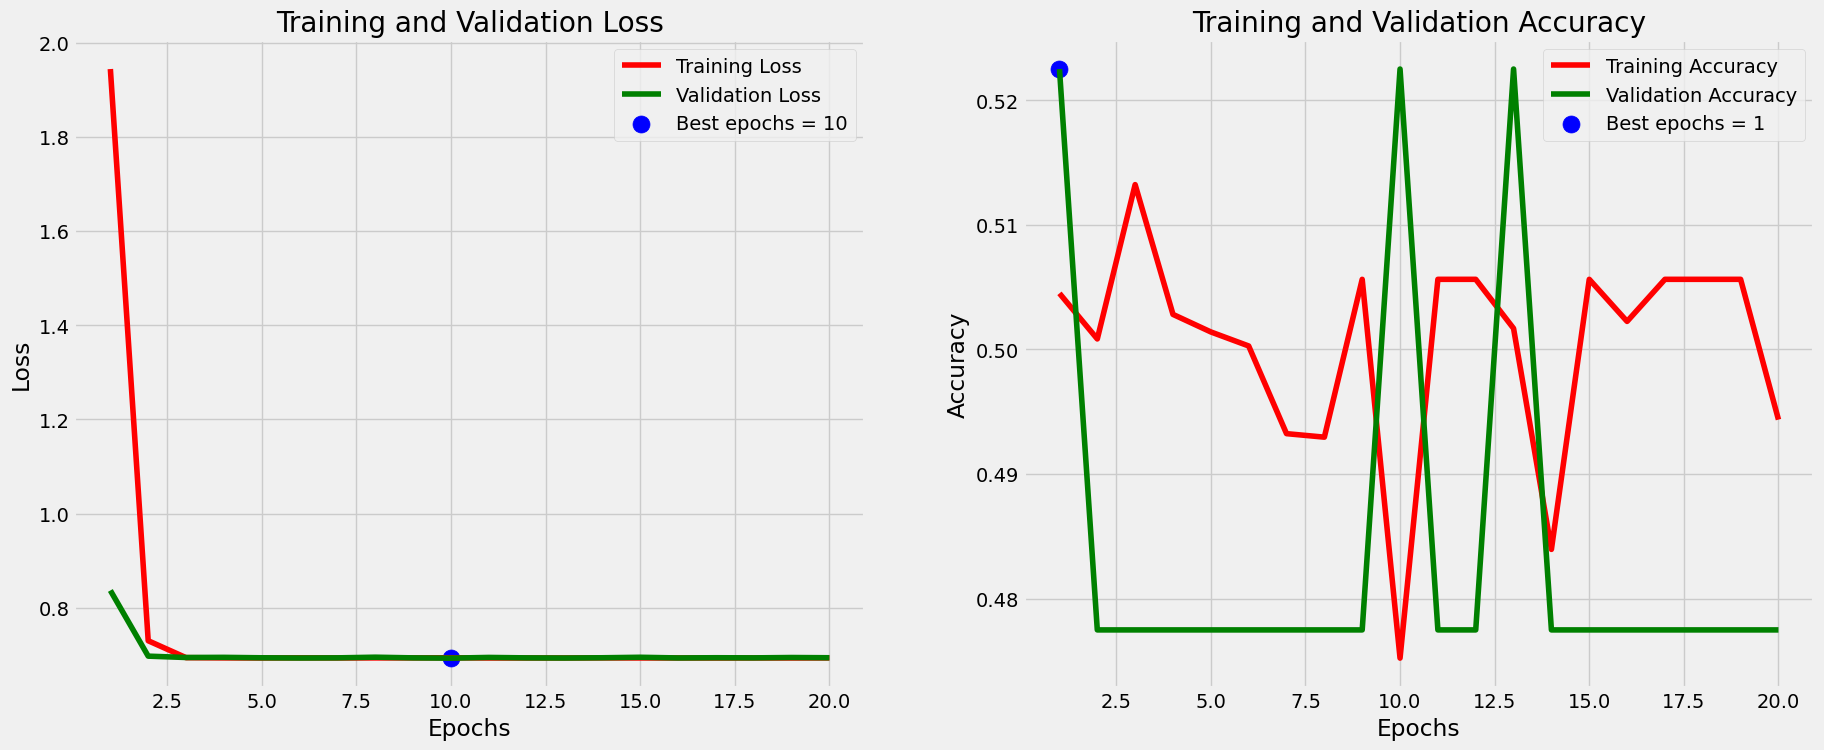

In [181]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_l2)

35/35 [==============================] - 7s 194ms/step


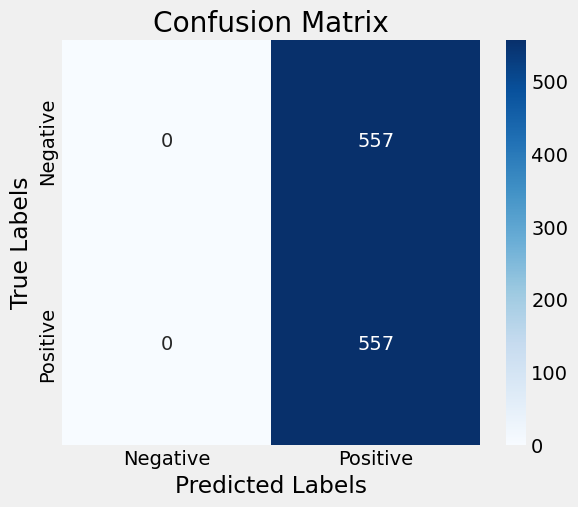

In [182]:
plot_confusion_matrix(model_with_adam_optimizer_l2)

### iii. Learning rate-0.001

#### Train

##### use previously trained model with learning rate-0.001 batch size=128 in section 'CNN Training and Evaluation with different batch sizes'

#### Model Evaluation

In [183]:
calculate_measures (model_with_adam_optimizer_64)

35/35 [==============================] - 7s 203ms/step - loss: 0.5421 - accuracy: 0.7522
Test Accuracy: 75.22%
35/35 [==============================] - 7s 201ms/step
accuracy:0.7522441744804382
loss:0.5421015620231628
precision:0.7051094890510949
recall:0.8671454219030521
F1_score:0.7777777777777778


(0.7522441744804382,
 0.5421015620231628,
 0.7051094890510949,
 0.8671454219030521,
 0.7777777777777778)

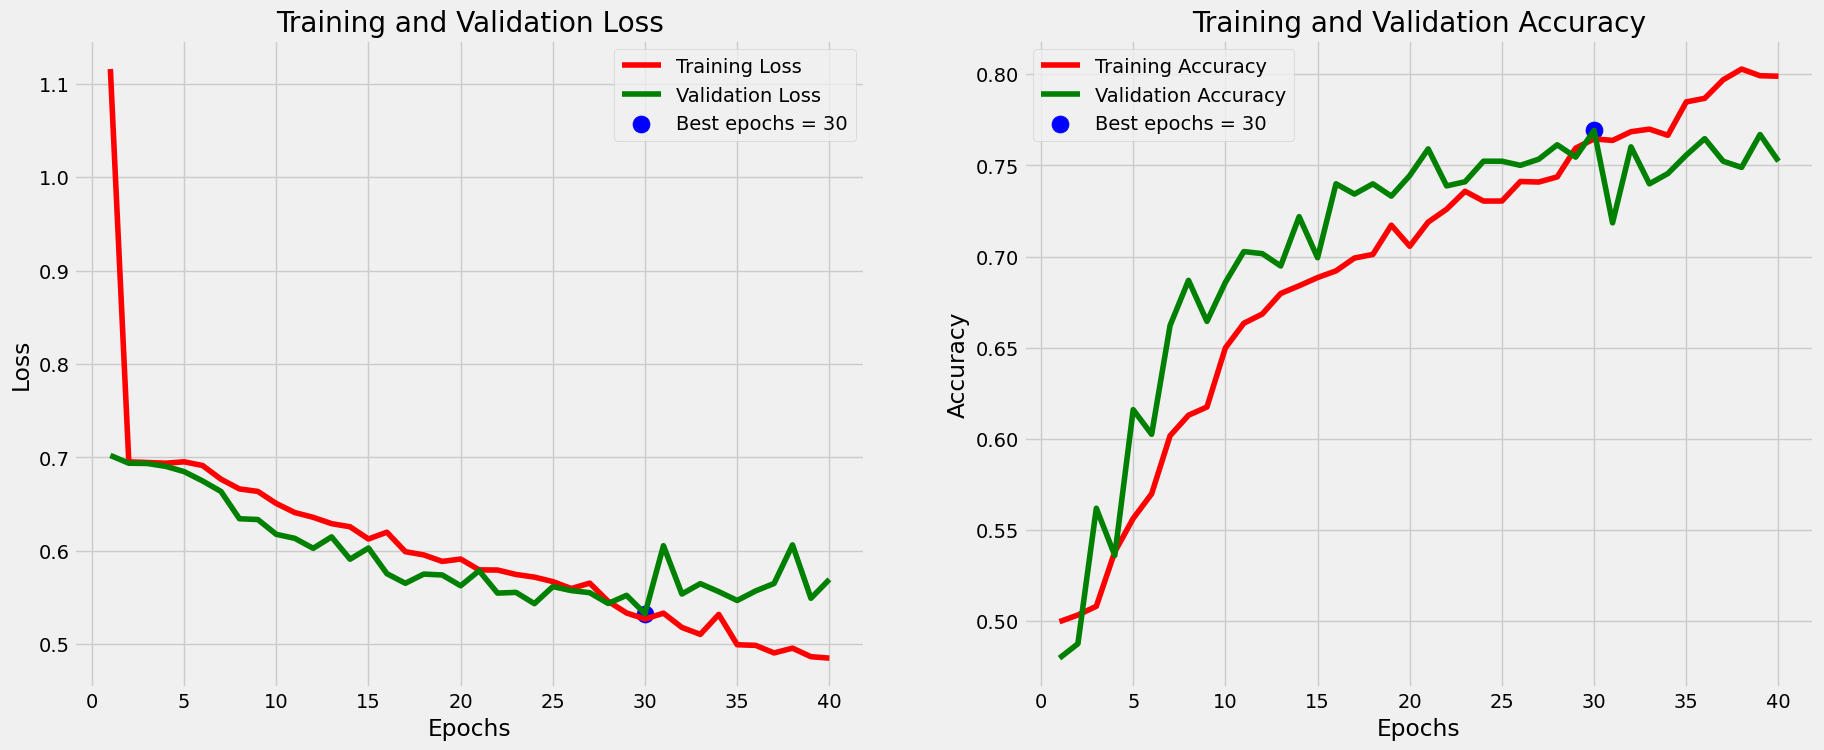

In [184]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_64)

35/35 [==============================] - 8s 213ms/step


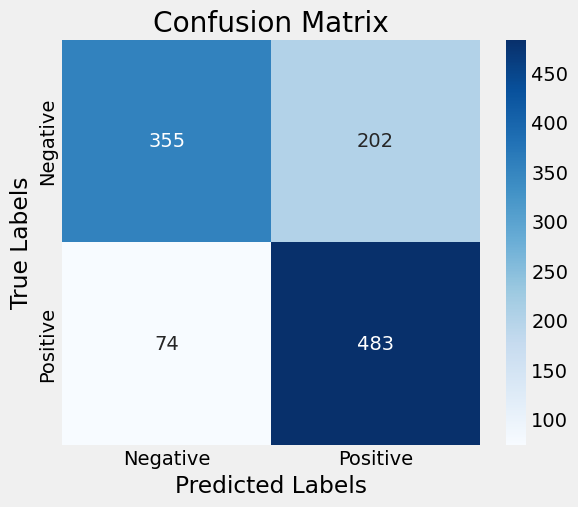

In [185]:
plot_confusion_matrix(model_with_adam_optimizer_64)

## 3. CNN Training and Evaluation with different optimizers

### i. Adam

#### Training

##### using previously trained model with adam opimizer -0.001 batch size-128 in section 'CNN Training and Evaluation with different batch sizes'

#### Model Evaluation

In [ ]:
calculate_measures (model_with_adam_optimizer_64)

In [ ]:
plot_accuracy_and_loss(history_model_with_adam_optimizer_64)

In [ ]:
plot_confusion_matrix(model_with_adam_optimizer_64)

### ii. NAdam

#### Training

In [212]:
K.clear_session()

from tensorflow.keras.optimizers import Nadam
optimizer = Nadam(learning_rate=0.001)
model_with_Nadam=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

# Train the model
history_model_with_Nadam=model_with_Nadam.fit(X_train_data,y_train_data,epochs=100,batch_size=64,validation_data=(X_val,y_val),callbacks=[early_stopping])


Epoch 1/100
56/56 [==============================] - 65s 1s/step - loss: 1.2111 - accuracy: 0.4944 - val_loss: 0.7026 - val_accuracy: 0.5225
Epoch 2/100
56/56 [==============================] - 63s 1s/step - loss: 0.6958 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.4775
Epoch 3/100
56/56 [==============================] - 64s 1s/step - loss: 0.6939 - accuracy: 0.5006 - val_loss: 0.6952 - val_accuracy: 0.5225
Epoch 4/100
56/56 [==============================] - 64s 1s/step - loss: 0.6948 - accuracy: 0.5290 - val_loss: 0.6970 - val_accuracy: 0.5158
Epoch 5/100
56/56 [==============================] - 66s 1s/step - loss: 0.6918 - accuracy: 0.5518 - val_loss: 0.6840 - val_accuracy: 0.6092
Epoch 6/100
56/56 [==============================] - 65s 1s/step - loss: 0.6865 - accuracy: 0.6141 - val_loss: 0.6727 - val_accuracy: 0.6520
Epoch 7/100
56/56 [==============================] - 65s 1s/step - loss: 0.6660 - accuracy: 0.6583 - val_loss: 0.6238 - val_accuracy: 0.6881
Epoch 8/100
5

#### Model Evaluation

In [220]:
calculate_measures (model_with_Nadam)

35/35 [==============================] - 7s 211ms/step - loss: 0.5415 - accuracy: 0.7621
Test Accuracy: 76.21%
35/35 [==============================] - 7s 209ms/step
[[0.98686653]
 [0.34731767]
 [0.83792806]
 ...
 [0.38642058]
 [0.0772194 ]
 [0.7681169 ]]
accuracy:0.7621185183525085
loss:0.5415432453155518
precision:0.7570422535211268
recall:0.7719928186714542
F1_score:0.7644444444444445


(0.7621185183525085,
 0.5415432453155518,
 0.7570422535211268,
 0.7719928186714542,
 0.7644444444444445)

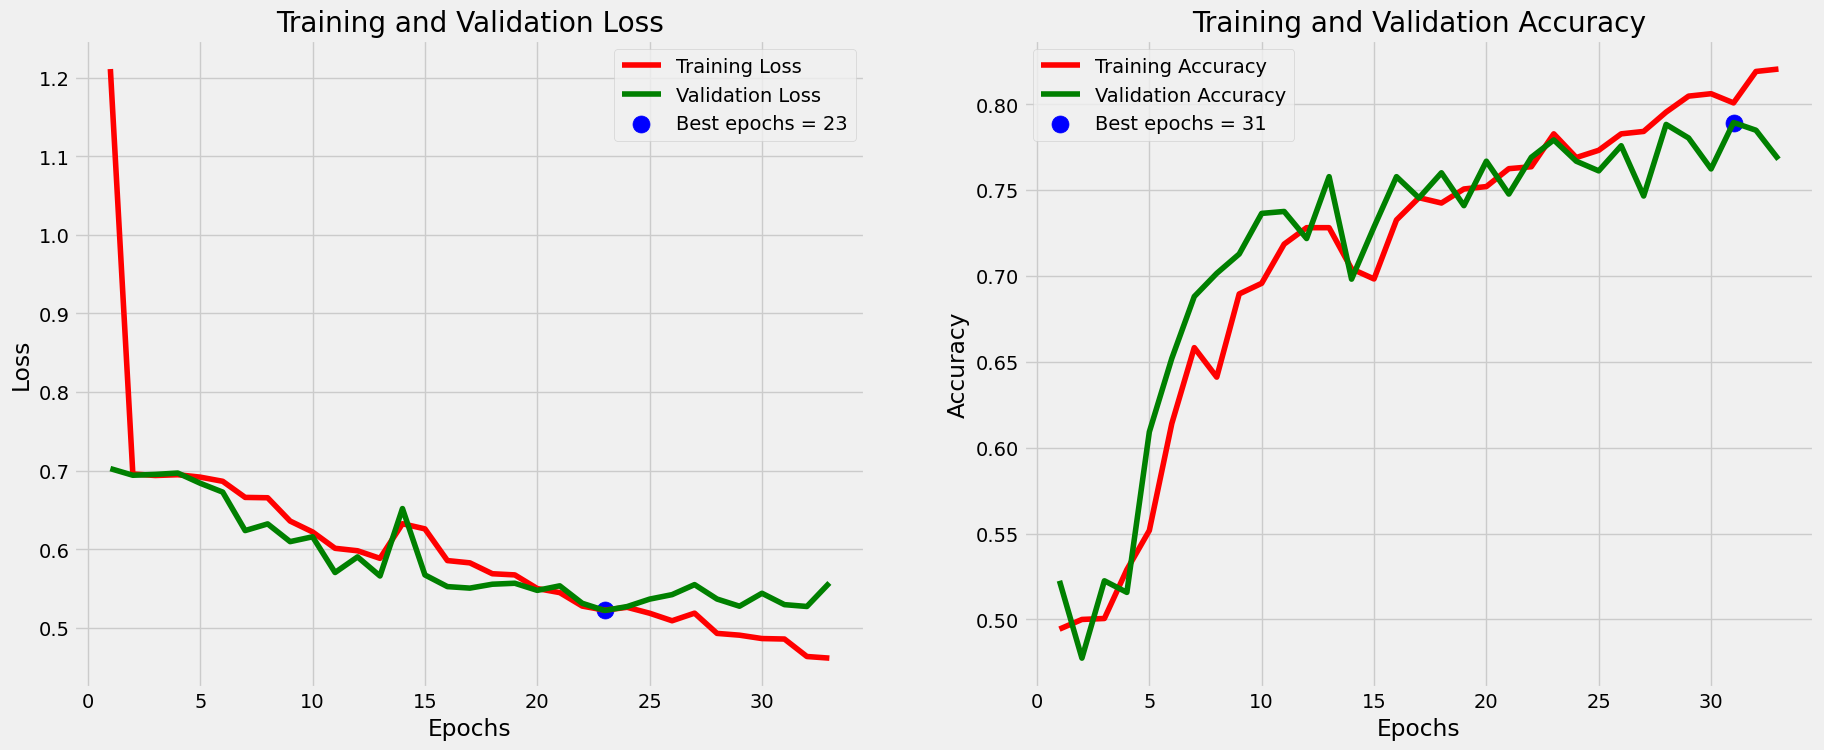

In [217]:
plot_accuracy_and_loss(history_model_with_Nadam)

35/35 [==============================] - 7s 208ms/step


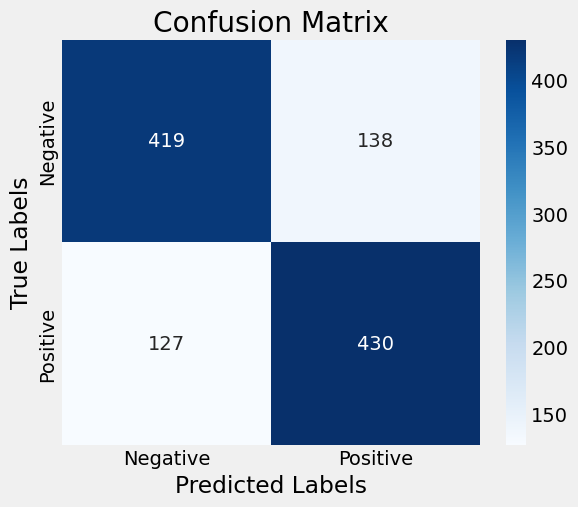

In [221]:
plot_confusion_matrix(model_with_Nadam)

In [222]:
K.clear_session()

from tensorflow.keras.optimizers import Nadam
momentum=0.9
optimizer = Nadam(learning_rate=0.001,beta_1=momentum)
model_with_Nadam_momentum=create_CNN_model(optimizer)

X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# Split the data into training and validation sets for this fold
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    

# Train the model
history_model_with_Nadam_momentum=model_with_Nadam_momentum.fit(X_train_data,y_train_data,epochs=100,batch_size=64,validation_data=(X_val,y_val),callbacks=[early_stopping])


Epoch 1/100
56/56 [==============================] - 67s 1s/step - loss: 1.2990 - accuracy: 0.5023 - val_loss: 0.7354 - val_accuracy: 0.4775
Epoch 2/100
56/56 [==============================] - 61s 1s/step - loss: 0.7084 - accuracy: 0.5138 - val_loss: 0.6984 - val_accuracy: 0.4786
Epoch 3/100
56/56 [==============================] - 64s 1s/step - loss: 0.6987 - accuracy: 0.5093 - val_loss: 0.7000 - val_accuracy: 0.5732
Epoch 4/100
56/56 [==============================] - 64s 1s/step - loss: 0.6980 - accuracy: 0.5434 - val_loss: 0.6907 - val_accuracy: 0.5619
Epoch 5/100
56/56 [==============================] - 65s 1s/step - loss: 0.6911 - accuracy: 0.5735 - val_loss: 0.6815 - val_accuracy: 0.6092
Epoch 6/100
56/56 [==============================] - 63s 1s/step - loss: 0.6772 - accuracy: 0.6096 - val_loss: 0.6684 - val_accuracy: 0.6768
Epoch 7/100
56/56 [==============================] - 64s 1s/step - loss: 0.6721 - accuracy: 0.6239 - val_loss: 0.6670 - val_accuracy: 0.6092
Epoch 8/100
5

In [223]:
calculate_measures (model_with_Nadam_momentum)

35/35 [==============================] - 8s 223ms/step - loss: 0.5618 - accuracy: 0.7531
Test Accuracy: 75.31%
35/35 [==============================] - 9s 241ms/step
[[0.9367639 ]
 [0.45777628]
 [0.88944966]
 ...
 [0.64125544]
 [0.2653285 ]
 [0.46201017]]
accuracy:0.7531418204307556
loss:0.5618186593055725
precision:0.7288961038961039
recall:0.8061041292639138
F1_score:0.7655583972719523


(0.7531418204307556,
 0.5618186593055725,
 0.7288961038961039,
 0.8061041292639138,
 0.7655583972719523)

In [ ]:
plot_accuracy_and_loss(history_model_with_Nadam_momentum)

In [ ]:
plot_confusion_matrix(model_with_Nadam_momentum)

## 4. Using cross fold validation(5 folds)

#### Train

In [317]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
K.clear_session()

# Define K-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store performance metrics across folds
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
fold_losses = []
train_accuracies=[]
val_accuracies=[]
train_losses=[]
val_losses=[]
cross_fold_models=[]
cross_fold_histories=[]


X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)

# K-Fold Cross Validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train), start=1):
    print(f"\nStarting Fold {fold}...")
    
    # Split the data into training and validation sets for this fold
    X_train_data, X_val_data = X_train[train_index], X_train[val_index]
    y_train_data, y_val_data = y_train[train_index], y_train[val_index]

    optimizer = Nadam(learning_rate=0.001)
    # Create a new model instance for each fold
    model_cross_fold = create_CNN_model(optimizer)
    cross_fold_models.append(model_cross_fold)
    
    # Train the model
    history_cross_fold = model_cross_fold.fit(X_train_data, y_train_data, epochs=100, batch_size=128, 
                        validation_data=(X_val_data, y_val_data), 
                        callbacks=[early_stopping])
    cross_fold_histories.append(history_cross_fold)

    train_accuracies.append(history_cross_fold.history['accuracy'])
    val_accuracies.append(history_cross_fold.history['val_accuracy'])
    train_losses.append(history_cross_fold.history['loss'])
    val_losses.append(history_cross_fold.history['val_loss'])

    
    # Get predictions and compute additional metrics
    y_val_pred = (model_cross_fold.predict(X_val_data) > 0.5).astype(int)  # Binarize predictions if binary classification

    # Calculate metrics
    accuracy, loss, precision, recall, f1=calculate_measures (model_cross_fold)
    
    # Store metrics for each fold
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)
    fold_accuracies.append(accuracy)
    fold_losses.append(loss)
    
    # Print fold results
    print(f"Fold {fold} - Validation Accuracy: {val_accuracy:.4f}, Loss: {val_loss:.4f}")
    print(f"            Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


# Calculate and print average metrics across all folds
avg_accuracy = np.mean(fold_accuracies)
avg_loss = np.mean(fold_losses)
avg_precision = np.mean(fold_precisions)
avg_recall = np.mean(fold_recalls)
avg_f1_score = np.mean(fold_f1_scores)




Starting Fold 1...
Epoch 1/100
28/28 [==============================] - 71s 2s/step - loss: 1.6857 - accuracy: 0.5183 - val_loss: 0.8468 - val_accuracy: 0.4775
Epoch 2/100
28/28 [==============================] - 65s 2s/step - loss: 0.7422 - accuracy: 0.5200 - val_loss: 0.7034 - val_accuracy: 0.5709
Epoch 3/100
28/28 [==============================] - 65s 2s/step - loss: 0.7000 - accuracy: 0.5349 - val_loss: 0.6980 - val_accuracy: 0.5563
Epoch 4/100
28/28 [==============================] - 43s 2s/step - loss: 0.6960 - accuracy: 0.5656 - val_loss: 0.6942 - val_accuracy: 0.5721
Epoch 5/100
28/28 [==============================] - 43s 2s/step - loss: 0.6935 - accuracy: 0.5961 - val_loss: 0.6761 - val_accuracy: 0.6453
Epoch 6/100
28/28 [==============================] - 43s 2s/step - loss: 0.6751 - accuracy: 0.6268 - val_loss: 0.6611 - val_accuracy: 0.6565
Epoch 7/100
28/28 [==============================] - 42s 2s/step - loss: 0.6572 - accuracy: 0.6501 - val_loss: 0.6388 - val_accuracy: 

#### Model Evauation

In [351]:
print('Summary of cross fold validation:')
print(f'avg_accuracy:{avg_accuracy}')
print(f'average_loss:{avg_loss}')
print(f'avg_precision:{avg_precision}')
print(f'avg_recall:{avg_recall}')
print(f'avg_f1_score:{avg_f1_score}')

Summary of cross fold validation
avg_accuracy:0.7488330245018006
average_loss:0.5571419835090637
avg_precision:0.7295371925194682
avg_recall:0.7928186714542191
avg_f1_score:0.7593902563353451


C:\Users\wbmad\AppData\Local\Temp\ipykernel_21196\2549996685.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


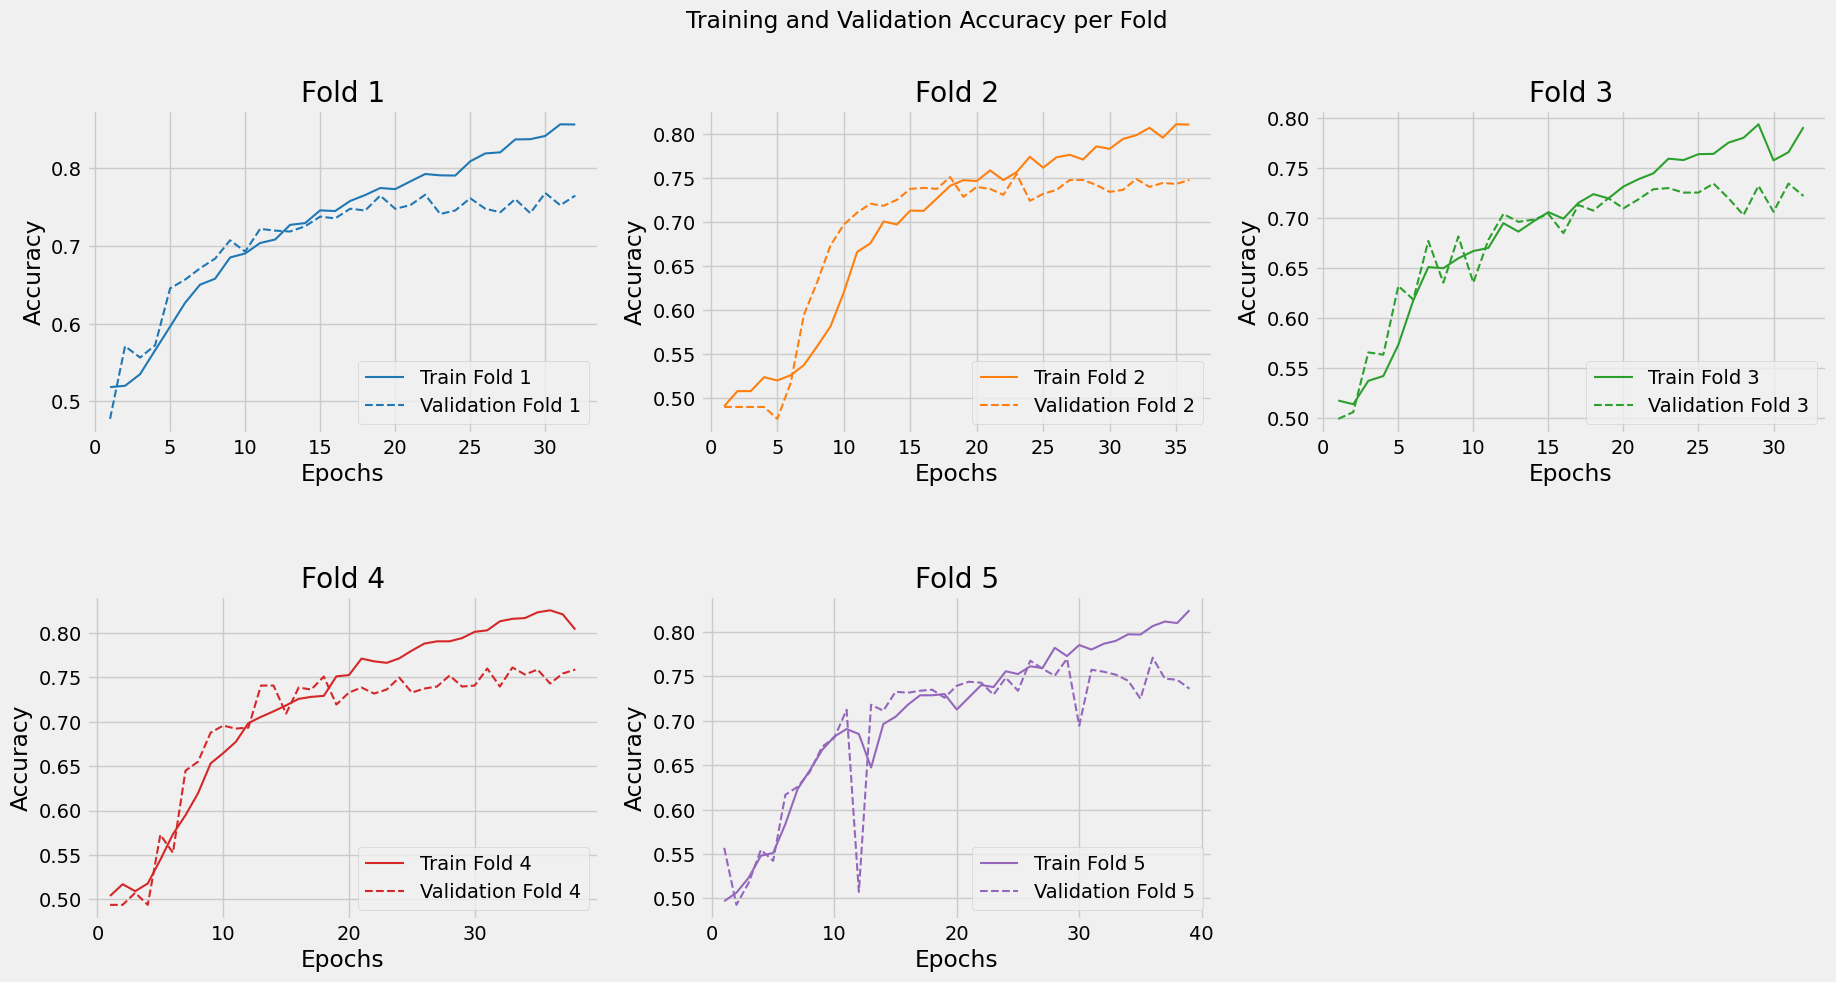

In [319]:

# Plot training accuracy for each fold
from matplotlib.cm import get_cmap

cmap = get_cmap('tab10')
numOfFolds=5
numOfCols=3
fig, axs = plt.subplots(2, numOfCols, figsize=(20,10))
fig.suptitle('Training and Validation Accuracy per Fold')

for i in range(numOfFolds):
    row=i//numOfCols
    if(i>2):
      col=i-(numOfCols)
    else:
      col=i
    ax=axs[row,col]
    
    color = cmap(i)  # Unique color for each fold
    epochs = range(1, len(train_accuracies[i]) + 1)
        
    ax.plot(epochs, train_accuracies[i], label=f'Train Fold {i+1}', color=color, linestyle='-', linewidth=1.5)

    # Plot validation accuracy with dashed line
    ax.plot(epochs, val_accuracies[i], label=f'Validation Fold {i+1}', color=color, linestyle='--', linewidth=1.5)

    ax.set_title(f'Fold {i+1}')  # Title for each subplot
    ax.set_xlabel('Epochs')      # Label for x-axis
    ax.set_ylabel('Accuracy')    # Label for y-axis
    ax.legend(loc='lower right') # Legend to show which line corresponds to which
    ax.grid(True)  # Grid for better readability


plt.subplots_adjust(hspace=0.5)
axs[1,2].set_visible(False)
plt.show()


C:\Users\wbmad\AppData\Local\Temp\ipykernel_21196\43865822.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


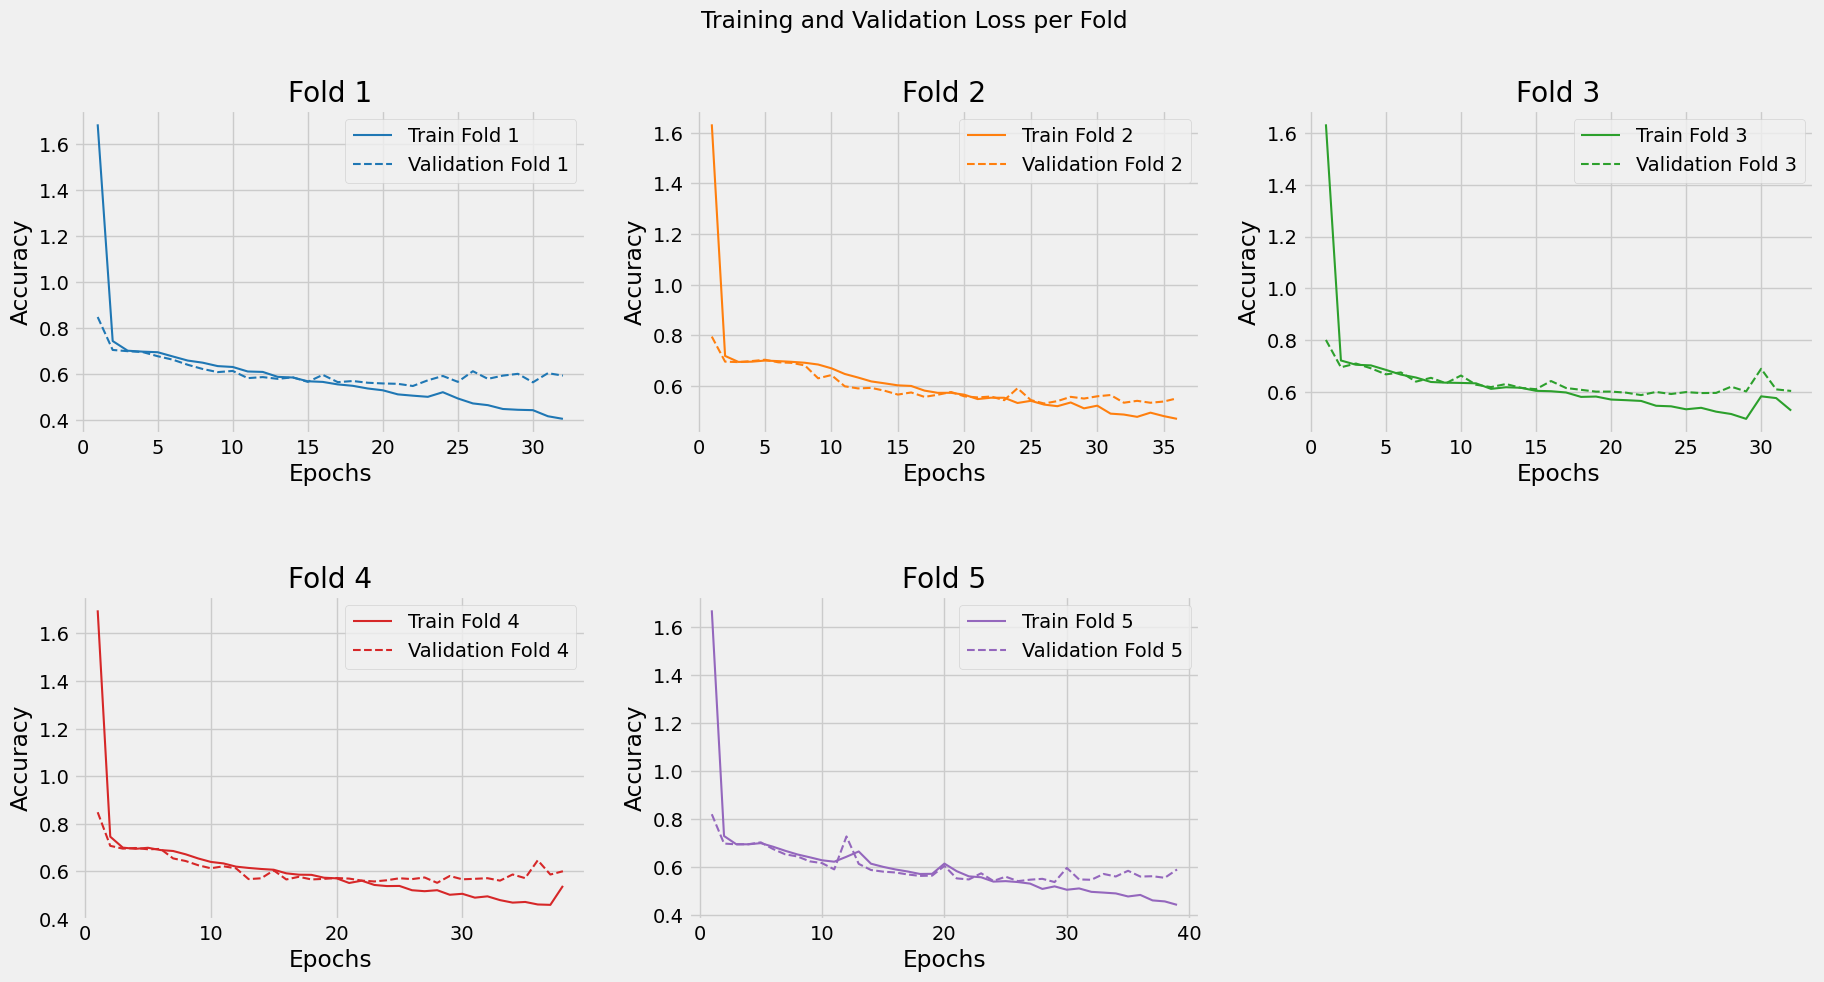

In [320]:
# Plot training accuracy for each fold

from matplotlib.cm import get_cmap

cmap = get_cmap('tab10')
numOfFolds=5
numOfCols=3
fig, axs = plt.subplots(2, numOfCols, figsize=(20,10))
fig.suptitle('Training and Validation Loss per Fold')

for i in range(numOfFolds):
    row=i//numOfCols
    if(i>2):
      col=i-(numOfCols)
    else:
      col=i
    ax=axs[row,col]
    
    color = cmap(i)  # Unique color for each fold
    epochs = range(1, len(train_accuracies[i]) + 1)
        
    ax.plot(epochs, train_losses[i], label=f'Train Fold {i+1}', color=color, linestyle='-', linewidth=1.5)

    # Plot validation accuracy with dashed line
    ax.plot(epochs, val_losses[i], label=f'Validation Fold {i+1}', color=color, linestyle='--', linewidth=1.5)

    ax.set_title(f'Fold {i+1}')  # Title for each subplot
    ax.set_xlabel('Epochs')      # Label for x-axis
    ax.set_ylabel('Accuracy')    # Label for y-axis
    ax.legend(loc='upper right') # Legend to show which line corresponds to which
    ax.grid(True)  # Grid for better readability


plt.subplots_adjust(hspace=0.5)
axs[1,2].set_visible(False)
plt.show()


35/35 [==============================] - 8s 222ms/step


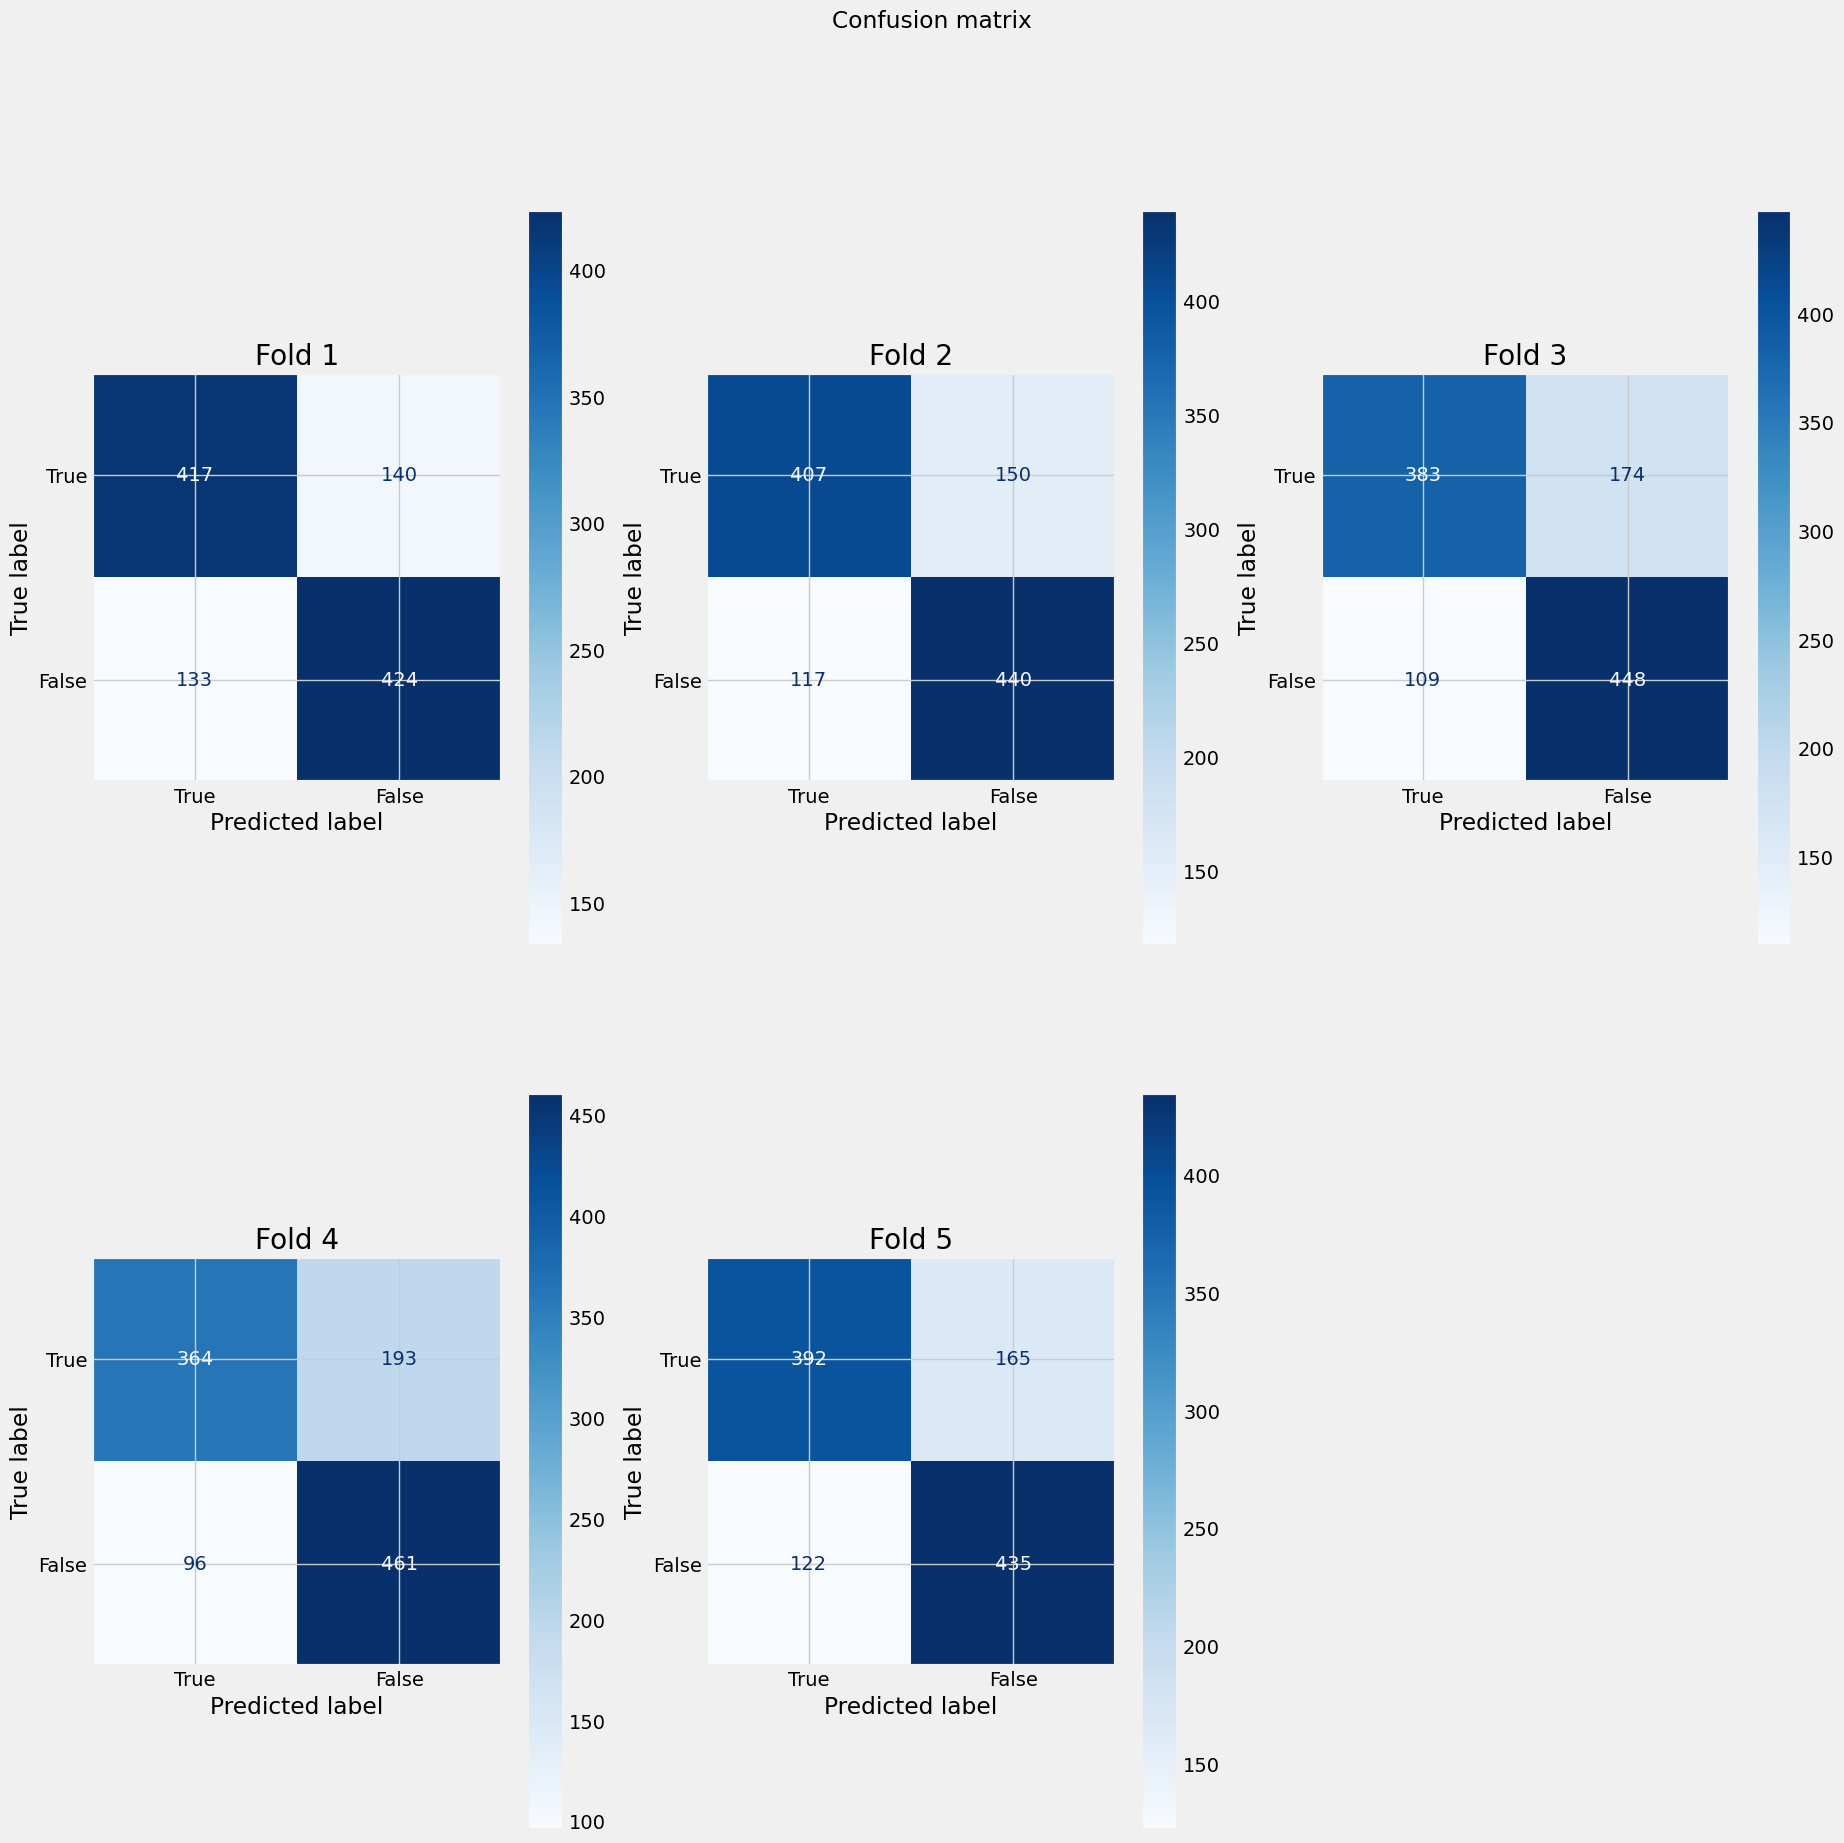

In [348]:

# Plot training accuracy for each fold
from matplotlib.cm import get_cmap
from sklearn.metrics import ConfusionMatrixDisplay

numOfFolds=5
numOfCols=3
fig, axs = plt.subplots(2, numOfCols, figsize=(20,20))
fig.suptitle('Confusion matrix')

for i in range(numOfFolds):
    row=i//numOfCols
    if(i>2):
      col=i-(numOfCols)
    else:
      col=i
    ax=axs[row,col]
     # Unique color for each fold
    epochs = range(1, len(train_accuracies[i]) + 1)
    X_train,y_train,X_test,y_test=load_data(train_true_images,train_false_images,test_true_images,test_false_images,train_true_labels,train_false_labels,test_true_labels,test_false_labels)
    y_pred_prob = cross_fold_models[i].predict(X_test)
    
    # Convert probabilities to binary predictions (0 or 1)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["True", "False"])
    disp.plot(ax=ax, cmap=plt.cm.Blues)
   
    ax.set_title(f'Fold {i+1}')  # Title for each subplot
    ax.grid(True)  # Grid for better readability


plt.subplots_adjust(hspace=0.2)
axs[1,2].set_visible(False)
plt.show()


# v. Summary

In [370]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Model names and empty lists for each metric
models = [model_with_adam_optimizer_32,model_with_adam_optimizer_64,model_with_adam_optimizer_128,model_with_adam_optimizer_512,model_with_adam_optimizer_l1,model_with_adam_optimizer_l2,model_with_adam_optimizer_l4,model_with_Nadam,model_cross_fold]
accuracies = []
losses = []
precisions = []
recalls = []
f1_scores = []
modelNames=[]


# Loop through each model, evaluate, and collect metrics
for model in models:
    # Train the model here if needed, then evaluate
    accuracy, loss, precision, recall, f1 = calculate_measures (model,verbose=0)
    
    # Append each metric to its corresponding list
    accuracies.append(accuracy)
    losses.append(loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    

# Create a DataFrame for comparison
df = pd.DataFrame({
    "Model Name": ['model_with_adam_optimizer_32','model_with_adam_optimizer_64','model_with_adam_optimizer_128','model_with_adam_optimizer_512','model_with_adam_optimizer_l1','model_with_adam_optimizer_l2','model_with_adam_optimizer_l4','model_with_Nadam','model_cross_fold'],
    "Accuracy": accuracies,
    "Loss": losses,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
})

# Set 'Model Name' as the index
df.set_index("Model Name", inplace=True)

# Display the table
print("\nSummary Table of All Models:")
print(df)



Summary Table of All Models:
                               Accuracy      Loss  Precision    Recall  \
Model Name                                                               
model_with_adam_optimizer_32   0.717235  0.558181   0.669944  0.856373   
model_with_adam_optimizer_64   0.752244  0.542102   0.705109  0.867145   
model_with_adam_optimizer_128  0.747756  0.541390   0.712963  0.829443   
model_with_adam_optimizer_512  0.745960  0.561661   0.714734  0.818671   
model_with_adam_optimizer_l1   0.500000  0.704692   0.500000  1.000000   
model_with_adam_optimizer_l2   0.500000  0.693173   0.500000  1.000000   
model_with_adam_optimizer_l4   0.705566  0.652116   0.676971  0.786355   
model_with_Nadam               0.762119  0.541543   0.757042  0.771993   
model_cross_fold               0.742370  0.557547   0.725000  0.780969   

                               F1 Score  
Model Name                               
model_with_adam_optimizer_32   0.751773  
model_with_adam_optimizer_64 

In [431]:
from rich.table import Table
from rich.console import Console

def print_model_evaluation_summary():


# List of model details with corresponding model, optimizer, batch size, and learning rate
 model_infos = [
    { "model": model_with_adam_optimizer_32, "optimizer": "Adam", "batch_size": 32, "learning_rate": 0.001,"cross_fold":"NO"},
    { "model": model_with_adam_optimizer_64, "optimizer": "Adam", "batch_size": 64, "learning_rate": 0.001,"cross_fold":"NO"},
    { "model": model_with_adam_optimizer_128, "optimizer": "Adam", "batch_size": 128, "learning_rate": 0.001,"cross_fold":"NO"},
    { "model": model_with_adam_optimizer_512, "optimizer": "Adam", "batch_size": 512, "learning_rate": 0.001,"cross_fold":"NO"},
    { "model": model_with_adam_optimizer_l1, "optimizer": "Adam", "batch_size": 32, "learning_rate": 0.1,"cross_fold":"NO"},
    {"model": model_with_adam_optimizer_l2, "optimizer": "Adam", "batch_size": 64, "learning_rate": 0.01,"cross_fold":"NO"},
    {"model": model_with_adam_optimizer_l4, "optimizer": "Adam", "batch_size": 128, "learning_rate": 0.001,"cross_fold":"NO"},
    {"model": model_with_Nadam, "optimizer": "Nadam", "batch_size": 64, "learning_rate": 0.001,"cross_fold":"NO"},
 ]
 console = Console()
 table = Table(title='Model with different parameters')

 
 models = [model_with_adam_optimizer_32,model_with_adam_optimizer_64,model_with_adam_optimizer_128,model_with_adam_optimizer_512,model_with_adam_optimizer_l1,model_with_adam_optimizer_l2,model_with_adam_optimizer_l4,model_with_Nadam,model_cross_fold]


 table.add_column("Optimizer",style="cyan",justify="left")
 table.add_column("Learning Rate",style="cyan",justify="left")
 table.add_column("batch Size",style="cyan",justify="left")
 table.add_column("Cross Fold",style="cyan",justify="left")
 table.add_column("Accuracy",style="cyan",justify="left")
 table.add_column("Loss",style="magenta",justify="left")
 table.add_column("Precision",style="magenta",justify="left")
 table.add_column("Recall",style="green",justify="left")
 table.add_column("F1-Score",style="green",justify="left")
    
 for modelInfo,model in zip(model_infos,models):
    # Train the model here if needed, then evaluate
    accuracy,loss, precision, recall, f1 = calculate_measures (model,verbose=0)
    # Append each metric to its corresponding list 
    table.add_row(modelInfo['optimizer'],str(modelInfo['learning_rate']),str(modelInfo['batch_size']),modelInfo['cross_fold'],str(accuracy),str(loss),str(precision),str(recall),str(f1))

 table.add_row('Nadam',str(0.001),str(32),'YES',str(avg_accuracy),str(avg_loss),str(avg_precision),str(avg_recall),str(avg_f1_score))
 console.print(table)


In [432]:
print_model_evaluation_summary()

                                          Model with different parameters                                          
┏━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃           ┃ Learning   ┃            ┃            ┃            ┃            ┃           ┃            ┃           ┃
┃ Optimizer ┃ Rate       ┃ batch Size ┃ Cross Fold ┃ Accuracy   ┃ Loss       ┃ Precision ┃ Recall     ┃ F1-Score  ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ Adam      │ 0.001      │ 32         │ NO         │ 0.7172352… │ 0.5581809… │ 0.669943… │ 0.8563734… │ 0.751773… │
│ Adam      │ 0.001      │ 64         │ NO         │ 0.7522441… │ 0.5421015… │ 0.705109… │ 0.8671454… │ 0.777777… │
│ Adam      │ 0.001      │ 128        │ NO         │ 0.7477558… │ 0.5413900… │ 0.712962… │ 0.8294434… │ 0.766804… │
│ Adam      │ 0.001      │ 512        │ NO         │ 0.7459604… │ 0.5616607… │ 0.714733… │ 0.8186714… │ 0.763179… │
│ Adam      │ 0.1        │ 32         │ NO         │ 0.5        │ 0.7046920… │ 0.5       │ 1.0        │ 0.666666… │
│ Adam      │ 0.01       │ 64         │ NO         │ 0.5        │ 0.6931730… │ 0.5       │ 1.0        │ 0.666666… │
│ Adam      │ 0.001      │ 128        │ NO         │ 0.7055655… │ 0.6521162… │ 0.676970… │ 0.7863554… │ 0.727574… │
│ Nadam     │ 0.001      │ 64         │ NO         │ 0.7621185… │ 0.5415432… │ 0.757042… │ 0.7719928… │ 0.764444… │
│ Nadam     │ 0.001      │ 32         │ YES        │ 0.7488330… │ 0.5571419… │ 0.729537… │ 0.7928186… │ 0.759390… │
└───────────┴────────────┴────────────┴────────────┴────────────┴────────────┴───────────┴────────────┴───────────┘

##### According to the above summary best parameters fo the model are Nadam(0.001),64 batches 

In [1]:
print(f'accuracy of model is {0.7621185 * 100:.2f}%')

accuracy of model is 76.21%
